<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Привет!
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> 
<br>Перед отправкой проекта обязательно перезапускай ядро через Kernel -> Restart & Run All и проверяй, чтобы все ячейки отработали без ошибок. 4 ячейка сейчас падает с ошибкой. Поправь, пожалуйста, чтобы я смог проверить твой проект
</div>


<div class="alert alert-info">
<b>Комментарий студента:</b> Привет! Перед отправкой перезапускала ядро, ошибок не было. Сейчас изменила путь к файлу, перезапустила ядро, 4 ячейка работает без ошибок
<br>
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Теперь всё работает) Перехожу к проверке!
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd #импорт библиотеки
import matplotlib.pyplot as plt #импорт библиотеки
import seaborn #импорт библиотеки

%config InlineBackend.figure_format = 'retina' #убираем лишнюю информацию в графиках
pd.set_option('display.max_columns', None) #вывод всех строк таблицы

In [2]:
data = pd.read_csv ('/datasets/real_estate_data.csv', sep='\t') #чтение файла с разделением
data.head(10)#смотрим df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Сделано ✔️
<br>
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отлично, что ты увеличиваешь лимит для отображаемых столбцов, чтобы было видно всю таблицу
</div>

In [3]:
data.info()#информация о столбцах
old_data = data#сохраним неизмененную таблицу для сравнения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Файл содержит 23699 строчек и 22 столбца.

Описание столбцов:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


In [4]:
data=data.rename(columns = {
    'cityCenters_nearest':'city_centers_nearest'})#переименован столбец в "змеиный" регистр

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец! Так датафрейм будет более аккуратным
</div>

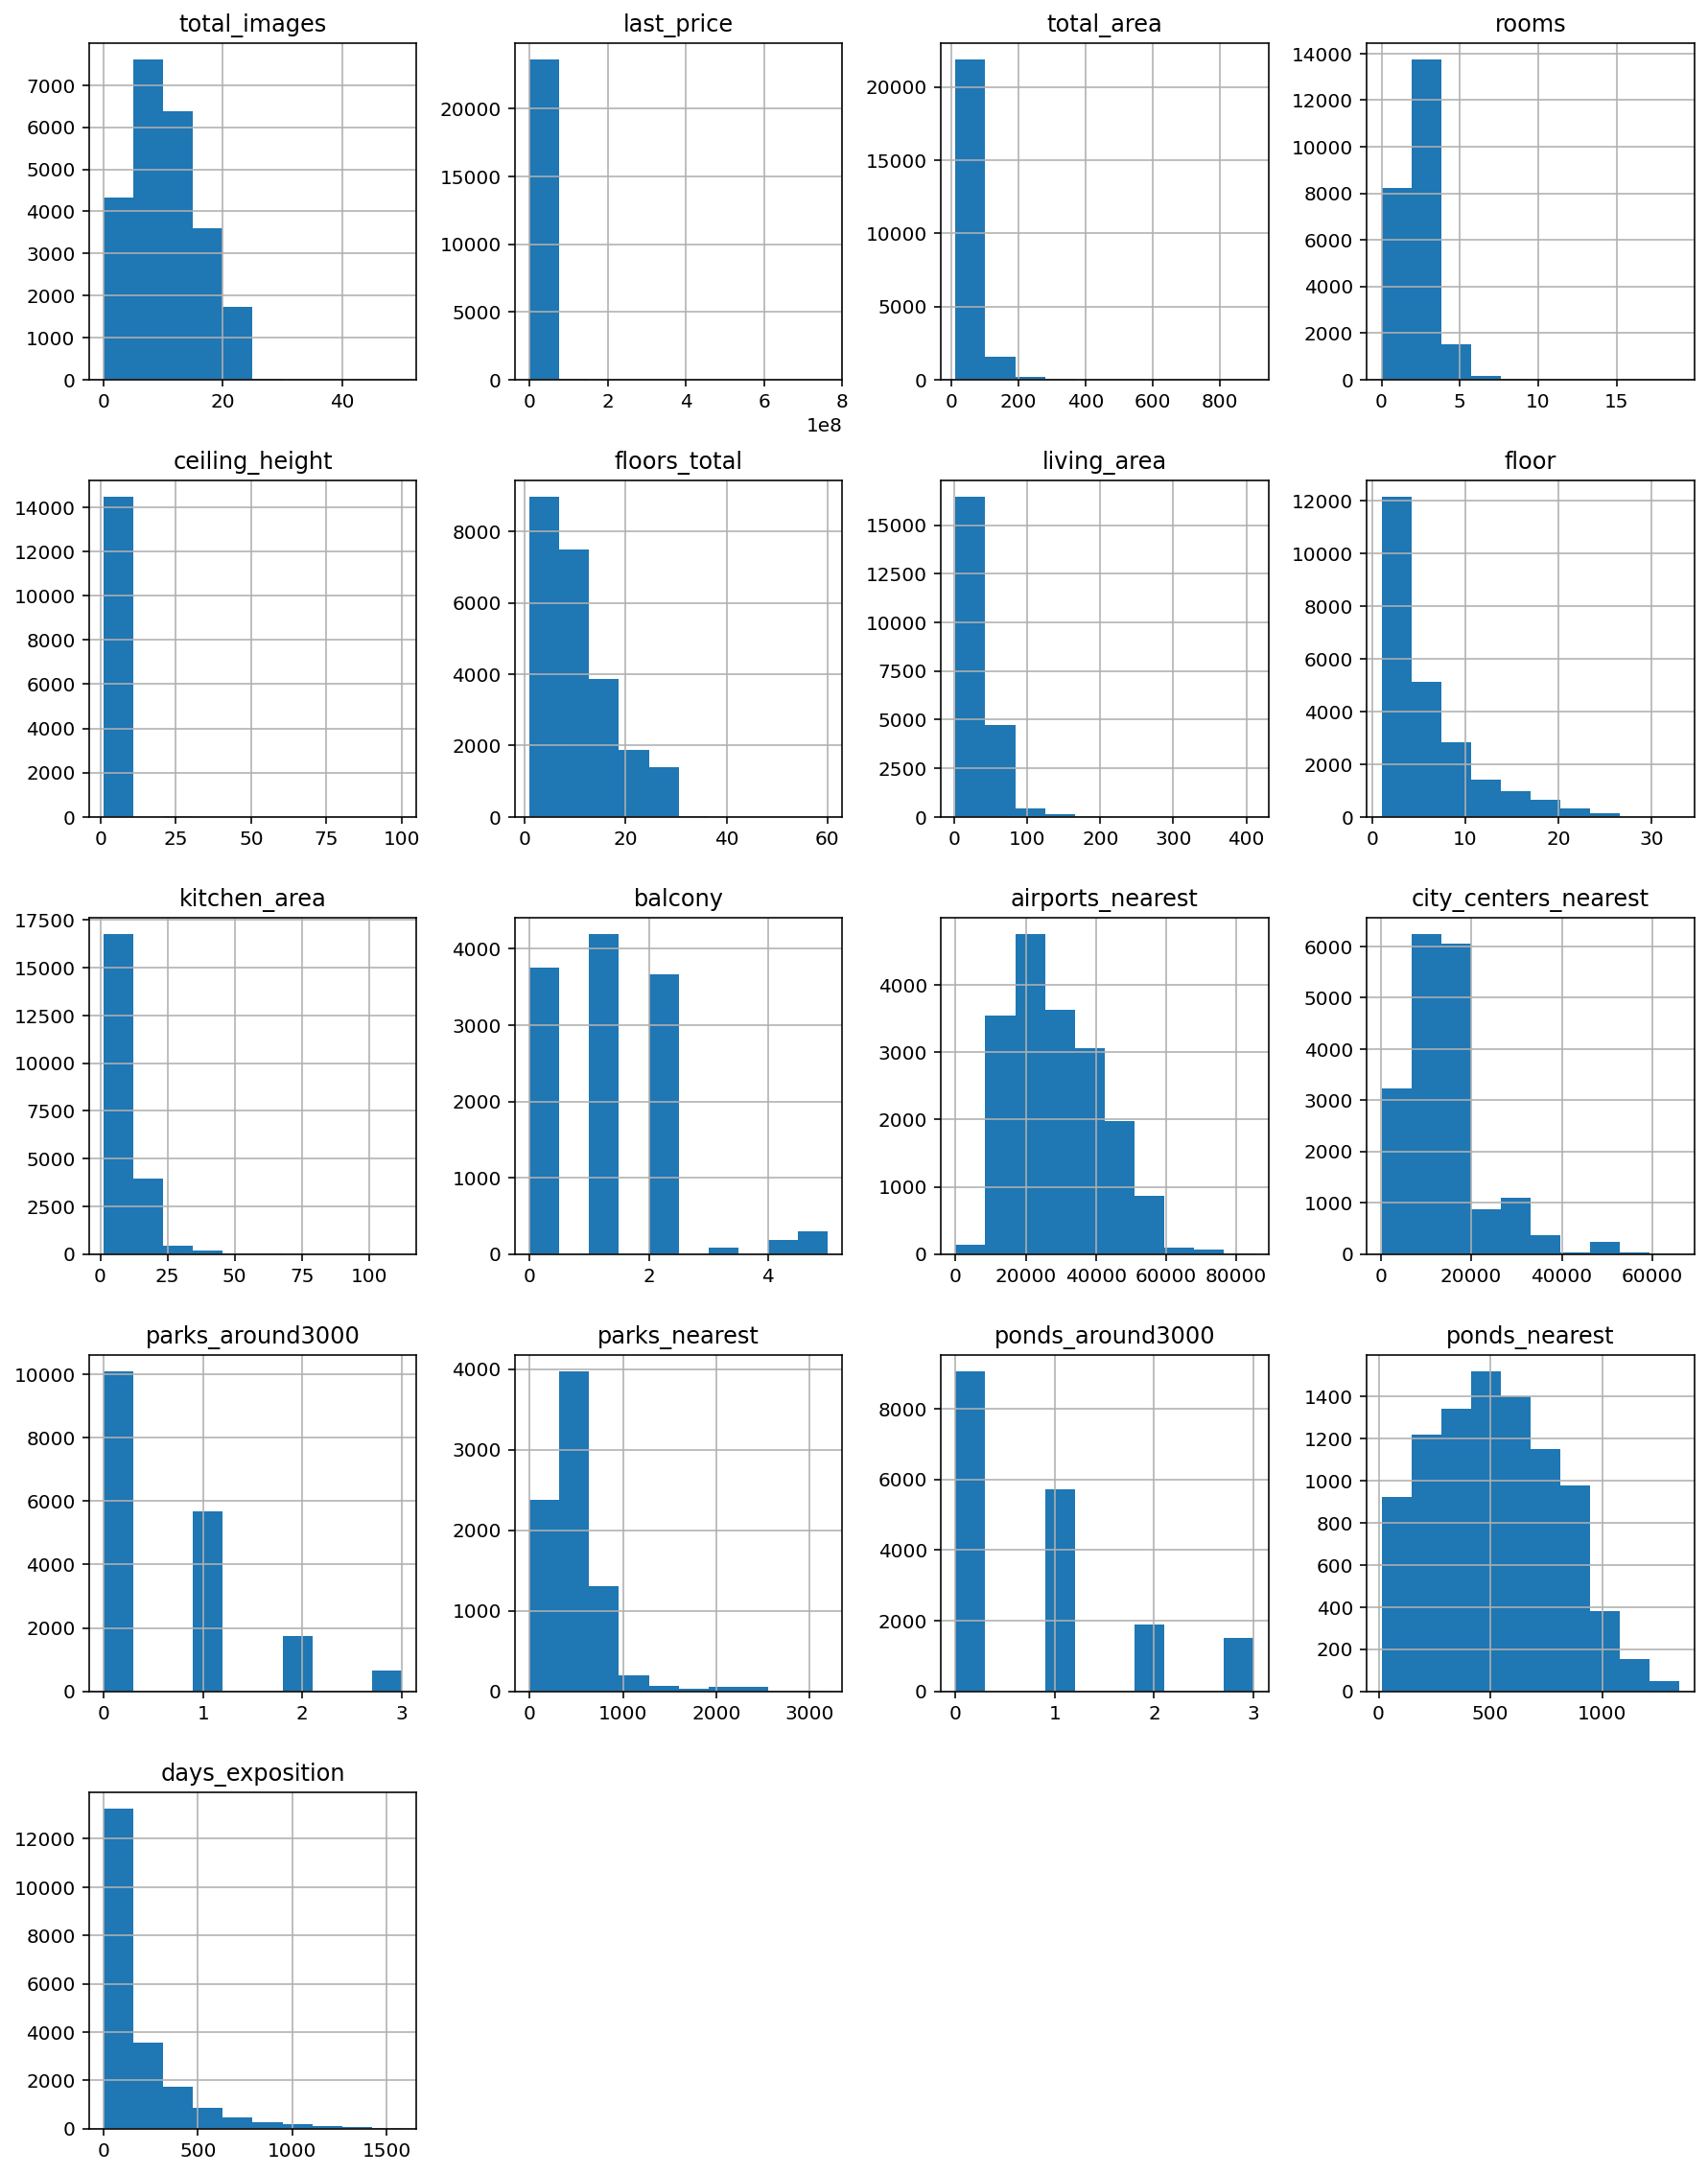

In [5]:
data.hist(figsize=(15, 20)); #просмотр гистограмм

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>

*Вывод*

- Датафрейм содержит 23699 строчек и 22 столбца, присутствуют значения типа float64, int64, object, bool.
- Столбец cityCenters_nearest переведен в "змеиный" регистр.
- На гистограммах по некоторым параметрам видны выбивающиеся значения, которые далее и необходимо проанализировать.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Рекомендую создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

### Предобработка данных

In [6]:
print(data.isna().sum()) #подсчёт пропусков
print()
print('Явных дубликатов:', data.duplicated().sum()) #подсчёт явных дубликатов

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Явных дубликатов: 0


Столбцы в которых имеются пропуски:

- ceiling_height высота потолков (м)
- floors_total всего этажей в доме
- living_area жилая площадь в квадратных метрах (м²)
- is_apartment апартаменты (булев тип)
- kitchen_area  площадь кухни в квадратных метрах (м²)
- balcony число балконов
- locality_name название населённого пункта
- airports_nearest расстояние до ближайшего аэропорта в метрах (м)
- city_centers_nearest расстояние до центра города (м)
- parks_around3000 число парков в радиусе 3 км
- parks_nearest расстояние до ближайшего парка (м)
- ponds_around3000 число водоёмов в радиусе 3 км
- ponds_nearest расстояние до ближайшего водоёма (м)
- days_exposition сколько дней было размещено объявление (от публикации до снятия)



#### Работа с пропусками и аномалиями в столбце *ceiling_height.*

In [7]:
print('Количество пустых значений:',data ['ceiling_height'].isna().sum()) #анализ пропусков в столбце ceiling_height (высота потолков)
print(data['ceiling_height'].sort_values().unique())

Количество пустых значений: 9195
[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.69
   3.7    3.75   3.76   3.78   3.8    3.82  

Высота потолков для анализа должна быть адекватной, поэтому обработаем аномальные значения. Предположим, что значения от 20 до 32 внесены без запятой и для этого поделим их на 10.

Для пропущенных значений и значений меньше 2 м и больше 6 м вычислим медианное значение и заполним им эти строчки.

In [8]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10 #поделили на 10 аномальные значения
ceiling_height_median = data.query('ceiling_height >= 2 & ceiling_height <=6')['ceiling_height'].median() #вычислили медиану "нормальных" потолков
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 6) | (data['ceiling_height'].isna()), 'ceiling_height'] = ceiling_height_median #заполнили медианой выбивающиеся и пустые значения 
print(data['ceiling_height'].sort_values().unique())#проверка 


[2.   2.2  2.25 2.26 2.3  2.34 2.4  2.45 2.46 2.47 2.48 2.49 2.5  2.51
 2.52 2.53 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61 2.62 2.63 2.64 2.65
 2.66 2.67 2.68 2.69 2.7  2.71 2.72 2.73 2.74 2.75 2.76 2.77 2.78 2.79
 2.8  2.81 2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89 2.9  2.91 2.92 2.93
 2.94 2.95 2.96 2.97 2.98 2.99 3.   3.01 3.02 3.03 3.04 3.05 3.06 3.07
 3.08 3.09 3.1  3.11 3.12 3.13 3.14 3.15 3.16 3.17 3.18 3.2  3.21 3.22
 3.23 3.24 3.25 3.26 3.27 3.28 3.29 3.3  3.31 3.32 3.33 3.34 3.35 3.36
 3.37 3.38 3.39 3.4  3.42 3.43 3.44 3.45 3.46 3.47 3.48 3.49 3.5  3.51
 3.52 3.53 3.54 3.55 3.56 3.57 3.58 3.59 3.6  3.62 3.63 3.65 3.66 3.67
 3.68 3.69 3.7  3.75 3.76 3.78 3.8  3.82 3.83 3.84 3.85 3.86 3.87 3.88
 3.9  3.93 3.95 3.98 4.   4.06 4.1  4.14 4.15 4.19 4.2  4.25 4.3  4.37
 4.4  4.45 4.5  4.65 4.7  4.8  4.9  5.   5.2  5.3  5.5  5.6  5.8  6.  ]


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбце с потолками нужно заполнить, но не нулем. Мы можем достаточно точно их восстановить так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Сделано ✔️ Честно сначала так и сделала, но потом подумала, что множество медианных может повлиять на анализ
<br>
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

#### Работа с пропусками и аномалиями в столбце *floors_total*.

In [9]:
print('Количество пустых значений:',data ['floors_total'].isna().sum()) 
print(data['floors_total'].sort_values().unique())

Количество пустых значений: 86
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 33. 34. 35. 36. 37. 52. 60.
 nan]


In [10]:
print(data['floors_total'].describe())

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [11]:
data.query('floors_total >37')#аномальных значений 52 и 60 этаж всего в количестве 2 шт

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,False,False,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,False,False,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


In [12]:
data = data.dropna(subset=['floors_total'])#удалили пустые 
data.drop(index=2253,inplace=True)#удалили строчку с аномальным значением
data.drop(index=16731,inplace=True)#удалили строчку с аномальным значением

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

#### Работа с пропусками и аномалиями в столбце *living_area*

In [13]:
print('Количество пустых значений:',data ['living_area'].isna().sum())

Количество пустых значений: 1870


In [14]:
print(data['living_area'].describe())

count    21741.000000
mean        34.464208
std         22.037795
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


In [15]:
data.query('living_area < 5')['living_area'].count()#посчитаем жилую площадь меньше 5 кв м

4

Аномальных значений немного.В данном параметре считаю можно оставить их в датафрейме.

In [16]:
mean_ratio_living_area = (data['living_area'].mean() / data['total_area'].mean())#среднее соотношение жилой площади к общей
print(mean_ratio_living_area)#проверка

data['living_area'] = data['living_area'].fillna(data['total_area']*mean_ratio_living_area)#пустые заполнили общая пл*на среднее соотношение   
print('Количество пустых значений:',data ['living_area'].isna().sum())#проверка

0.5711463329100079
Количество пустых значений: 0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>living_area / kithen_area можно найти соотношение средней жилой / кухонной площади к средней общей площади и использовать полученное значение для замены пропусков
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Сделано ✔️
<br>
</div>

#### Работа с пропусками и аномалиями в столбце *is_apartment*

In [17]:
print('Количество пустых значений:',data ['is_apartment'].isna().sum()) 
print(data['is_apartment'].sort_values().unique())

Количество пустых значений: 20836
[False True nan]


In [18]:
data['is_apartment'] = data['is_apartment'].fillna(False) #предположим, что где отсутствуют значения значит это не апартаменты
data ['is_apartment'].isna().sum()#проверка

0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

#### Работа с пропусками и аномалиями в столбце *kitchen_area*

In [19]:
print('Количество пустых значений:',data ['kitchen_area'].isna().sum())

Количество пустых значений: 2231


In [20]:
print(data['kitchen_area'].describe())

count    21380.000000
mean        10.564115
std          5.904506
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


Обработаем сначала пустые значения

In [21]:
mean_ratio_kitchen_area = (data['kitchen_area'].mean() / data['total_area'].mean())#среднее соотношение площади кухни к общей
print(mean_ratio_kitchen_area)#проверка

data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*mean_ratio_kitchen_area)#пустые заполнили общая пл*на среднее соотношение   
print('Количество пустых значений:',data ['kitchen_area'].isna().sum())#проверка


0.17507019264922655
Количество пустых значений: 0


In [22]:
print('Количество аномальных значений:', data.query('kitchen_area < 4 & studio == False')['kitchen_area'].count())#количество аномальных кухонь увеличилось
data = data[((data['kitchen_area'] > 4) & (data['studio'] == False))|(data['studio'] == True)|(data['kitchen_area'] >= 4) & (data['studio'] == False)] #исключили из data
print('Количество аномальных значений после обработки :', data.query('kitchen_area < 4 & studio == False')['kitchen_area'].count())#проверка

Количество аномальных значений: 76
Количество аномальных значений после обработки : 0


In [23]:
#проверим есть ли квартиры с общей площадью меньше чем сумма жилой и кухни 
print(data.query('total_area < kitchen_area+living_area')['total_area'].count())
data = data[data['total_area'] >= data['kitchen_area']+data['living_area']]#исключили из data
print(data.query('total_area < kitchen_area+living_area')['total_area'].count())#проверка

114
0


Пустые значений по площади кухонной зоны заменили на общее значение (среднее соотношение кухонной зоны к общей * на общую площадь). Аномальные размеры кухни меньше 4 кв.м. не в студиях в количестве 54 штук исключили из датафрейма. Исключили также строчки, где общая площадь меньше суммы площади кухни и жилой зоны, при этом у некоторых есть еще балконы (114 шт.), здесь явно кроется ошибка при внесении данных по квартире в одном из параметров.
Итого после обработки исключено 168 строчки.

#### Работа с пропусками и аномалиями в столбце *balcony*

In [24]:
print('Количество пустых значений:',data ['balcony'].isna().sum()) #проверка после удаления строчек в предыдущей обработке
print(data['balcony'].sort_values().unique())

Количество пустых значений: 11387
[ 0.  1.  2.  3.  4.  5. nan]


In [25]:
data['balcony'] = data['balcony'].fillna(0)#заполним пустые строки значением 0 (предположим, что балконов нет)
data ['balcony'].isna().sum()#проверка

0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

#### Работа с пропусками, аномалиями и дубликатами в столбце *locality_name*

In [26]:
print('Количество пустых значений:',data ['locality_name'].isna().sum()) #проверка после удаления строчек в предыдущей обработке
print(data['locality_name'].sort_values().unique())


Количество пустых значений: 48
['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Бат

In [27]:
data['locality_name'] = data['locality_name'].str.lower()#уберем заглавные буквы
data=data.dropna(subset=['locality_name'])#удалили пустые значения, так как без них анализ сложно провести

In [28]:
data ['locality_name'].isna().sum()#проверка

0

In [29]:
def clean(name):
    splited_name = name.split(' ')
    words_for_remove = {'село', 'поселок', 'посёлок', 'деревня',  'товарищество', 'садовое', 'типа', 'железнодорожной', 'городского', 'городской', 'коттеджный', 'станции', 'имени', 'при', 'cадоводческое', 'некоммерческое', 'садоводческое' } #set()
    good_words = [word for word in splited_name if word.lower() not in words_for_remove]#цикл в строке
    return ' '.join(good_words)

data['locality_name'] = data['locality_name'].apply(clean)

In [30]:
data['locality_name'].sort_values().unique()#проверка

array(['агалатово', 'александровская', 'алексеевка', 'аннино', 'аро',
       'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'вещево',
       'виллози', 'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпосёлок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород', 'извара'

In [31]:
data.duplicated().sum()#дубликатов нет

0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

#### Работа с пропусками и аномалиями в столбце *city_centers_nearest*

In [32]:
print('Количество пустых значений:',data ['city_centers_nearest'].isna().sum()) #проверка после удаления строчек в предыдущей обработке
print('Минимальное значение:', data['city_centers_nearest'].min())#нет аномалий
print('Максимальное значение:', data['city_centers_nearest'].max())#нет аномалий

Количество пустых значений: 5436
Минимальное значение: 181.0
Максимальное значение: 65968.0


In [33]:
#необходимо проверить уникальные значения в locality_name (для каких н.п. не указано расстояние до центра)
no_centers = data.query('city_centers_nearest.isna()')
print(no_centers['locality_name'].value_counts())
#закономерности не видно, информация отсутствует как в городах, так и в деревнях


мурино           568
кудрово          467
всеволожск       391
гатчина          303
выборг           235
                ... 
шугозеро           1
жилпосёлок         1
трубников бор      1
сижно              1
раздолье           1
Name: locality_name, Length: 287, dtype: int64


Данный параметр оставим без изменений. Аномалий не выявлено, пустые оставим для дальнейшего анализа.

#### Работа с пропусками и аномалиями в столбце *airports_nearest*

In [34]:
print('Количество пустых значений:',data ['airports_nearest'].isna().sum()) #проверка после удаления строчек в предыдущей обработке
print('Минимальное значение:', data['airports_nearest'].min())
print('Максимальное значение:', data['airports_nearest'].max())


Количество пустых значений: 5459
Минимальное значение: 0.0
Максимальное значение: 84869.0


In [35]:
data.query('airports_nearest == 0')#только 1 строка со значение 0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,False,False,False,6.0,2.0,санкт-петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


In [36]:
data = data[(data['airports_nearest'] != 0)] #исключили строчку где информация о расстоянии до аэропорта равно 0
print('Минимальное значение:', data['airports_nearest'].min())#проверка

Минимальное значение: 6450.0


Количество пустых значений большое, заполнить каким-либо значением будет некорректно. Оставим без изменений.

#### Работа с пропусками и аномалиями в столбцах *parks_nearest* и *parks_around3000*

In [37]:
print('Количество пустых значений в parks_nearest:',data ['parks_nearest'].isna().sum()) #проверка после удаления строчек в предыдущей обработке
print('Минимальное значение parks_nearest:', data['parks_nearest'].min())#аномалий нет
print('Максимальное значение parks_nearest:', data['parks_nearest'].max()) #максимум близок к 3 км, значит данные есть только по ближайщим паркам, которые и ограничены этим растоянием как и в столбце parks_around3000
print('Количество парков дальше 3 км:', data.query('parks_nearest > 3000 ')['parks_nearest'].count())

Количество пустых значений в parks_nearest: 15394
Минимальное значение parks_nearest: 1.0
Максимальное значение parks_nearest: 3190.0
Количество парков дальше 3 км: 4


In [38]:
print('Количество пустых значений в parks_around3000:',data ['parks_around3000'].isna().sum()) #проверка после удаления строчек в предыдущей обработке
print('Минимальное значение parks_around3000:', data['parks_around3000'].min())#аномалий нет
print('Максимальное значение parks_around3000:', data['parks_around3000'].max())#аномалий нет
print('Количество квартир без ближайших парков:', data.query('parks_around3000 == 0 ')['parks_around3000'].count())#значение близко к пустым в parks_nearest

Количество пустых значений в parks_around3000: 5435
Минимальное значение parks_around3000: 0.0
Максимальное значение parks_around3000: 3.0
Количество квартир без ближайших парков: 9963


Необходимо проверить действительно ли, если количество ближайших парков равно 0, то и расстояние до ближайщего парка пустое в таблице.

In [39]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)#заполнили пустые
print(data.query('parks_nearest == 0 & parks_around3000 == 0')['parks_nearest'].count())
#можно только предположить очевидное,что ближайших парков просто нет и пустые значения в parks_nearest оставить пустыми. 
#Нет ближайщих парков, значит и нет расстояния до них.
data.loc[data['parks_nearest']==0,'parks_nearest']=None#вернули пустые значения



9959


#### Работа с пропусками и аномалиями в столбце *ponds_nearest* и *ponds_around3000*

In [40]:
print('Количество пустых значений в ponds_nearest:',data ['ponds_nearest'].isna().sum()) #проверка после удаления строчек в предыдущей обработке
print('Минимальное значение ponds_nearest:', data['ponds_nearest'].min())#аномалий нет
print('Максимальное значение ponds_nearest:', data['ponds_nearest'].max()) #максимум близок к 3 км, значит данные есть только по ближайщим паркам, которые и ограничены этим растоянием как и в столбце parks_around3000
print('Количество водоёмов дальше 3 км:', data.query('ponds_nearest > 3000 ')['ponds_nearest'].count())

Количество пустых значений в ponds_nearest: 14407
Минимальное значение ponds_nearest: 13.0
Максимальное значение ponds_nearest: 1344.0
Количество водоёмов дальше 3 км: 0


In [41]:
print('Количество пустых значений в ponds_around3000:',data ['ponds_around3000'].isna().sum()) #проверка после удаления строчек в предыдущей обработке
print('Минимальное значение ponds_around3000:', data['ponds_around3000'].min())#аномалий нет
print('Максимальное значение ponds_around3000:', data['ponds_around3000'].max())#аномалий нет
print('Количество квартир без ближайших водоёмов:', data.query('ponds_around3000 == 0 ')['ponds_around3000'].count())#значение близко к пустым в parks_nearest

Количество пустых значений в ponds_around3000: 5435
Минимальное значение ponds_around3000: 0.0
Максимальное значение ponds_around3000: 3.0
Количество квартир без ближайших водоёмов: 8972


Действуем аналогично как и с парками. Проверяем на аномалии, если количество ближайших водоёмов равно 0, то и расстояние до ближайщего водоёма должно быть пустое.

In [42]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)#заполнили пустые
print(data.query('ponds_nearest == 0 & ponds_around3000 == 0')['ponds_nearest'].count())
#Идеально.Нет ближайщих водоёмов, значит и нет расстояния до них.
data.loc[data['ponds_nearest']==0,'ponds_nearest']=None#вернули пустые значения

8972


#### Работа с пропусками и аномалиями в столбце *days_exposition*

In [43]:
print('Количество пустых значений в days_exposition:',data ['days_exposition'].isna().sum()) #проверка после удаления строчек в предыдущей обработке
print('Минимальное значение days_exposition:', data['days_exposition'].min())#аномалий нет
print('Максимальное значение days_exposition:', data['days_exposition'].max())#аномалий нет

Количество пустых значений в days_exposition: 3154
Минимальное значение days_exposition: 1.0
Максимальное значение days_exposition: 1580.0


Пустые значения в данном столбцы исключать не будем, так как объявления возможно всё ещё актуальны и на анализ не влияют.

In [44]:
data.isna().sum()#проверяем что осталось по итогу

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5459
city_centers_nearest     5436
parks_around3000         5435
parks_nearest           15394
ponds_around3000         5435
ponds_nearest           14407
days_exposition          3154
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23372 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23372 non-null  int64  
 1   last_price            23372 non-null  float64
 2   total_area            23372 non-null  float64
 3   first_day_exposition  23372 non-null  object 
 4   rooms                 23372 non-null  int64  
 5   ceiling_height        23372 non-null  float64
 6   floors_total          23372 non-null  float64
 7   living_area           23372 non-null  float64
 8   floor                 23372 non-null  int64  
 9   is_apartment          23372 non-null  bool   
 10  studio                23372 non-null  bool   
 11  open_plan             23372 non-null  bool   
 12  kitchen_area          23372 non-null  float64
 13  balcony               23372 non-null  float64
 14  locality_name         23372 non-null  object 
 15  airports_nearest   

#### Анализ столбцов на аномалии

Остались столбцы, по которым не был проведен анализ на имеющиеся аномальные значения, так как отсутвующих значений в них не было. Исключаем из проверки на аномалии столбцы с булевым значением.

In [46]:
#last_price

In [47]:
print('Минимальное значение:', data['last_price'].min())#аномальное значение посмотрим в таблице
print('Максимальное значение:', data['last_price'].max())

Минимальное значение: 12190.0
Максимальное значение: 763000000.0


In [48]:
data.query('last_price <400000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,False,False,False,40.5,0.0,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


In [49]:
data = data[data['last_price'] >400000]#исключили строку с низкой ценой

In [50]:
#total_area

In [51]:
print('Минимальное значение:', data['total_area'].min())#нет аномальных значений
print('Максимальное значение:', data['total_area'].max())

Минимальное значение: 15.5
Максимальное значение: 900.0


In [52]:
#first_day_exposition

In [53]:
print('Минимальное значение:', data['first_day_exposition'].min())#нет аномальных значений
print('Максимальное значение:', data['first_day_exposition'].max())#нет аномальных значений

Минимальное значение: 2014-11-27T00:00:00
Максимальное значение: 2019-05-03T00:00:00


In [54]:
#rooms

In [55]:
print('Минимальное значение:', data['rooms'].min())#нет аномальных значений
print('Максимальное значение:', data['rooms'].max())#нет аномальных значений

Минимальное значение: 0
Максимальное значение: 19


In [56]:
#floor

In [57]:
print('Минимальное значение:', data['floor'].min())#нет аномальных значений
print('Максимальное значение:', data['floor'].max())#нет аномальных значений

Минимальное значение: 1
Максимальное значение: 33


Аномальное значение в данном пункте только в столбце last_price. Возможно цена была внесена некорректно, но так как строка всего одна, то она была исключена. Также были исключены единичные случаи, где у квартир общая площадь более 300 кв.м.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Диапазоны для аномальных значений подобраны и удалены верно!
</div>

#### Анализ и корректировка типов данных 

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23371 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23371 non-null  int64  
 1   last_price            23371 non-null  float64
 2   total_area            23371 non-null  float64
 3   first_day_exposition  23371 non-null  object 
 4   rooms                 23371 non-null  int64  
 5   ceiling_height        23371 non-null  float64
 6   floors_total          23371 non-null  float64
 7   living_area           23371 non-null  float64
 8   floor                 23371 non-null  int64  
 9   is_apartment          23371 non-null  bool   
 10  studio                23371 non-null  bool   
 11  open_plan             23371 non-null  bool   
 12  kitchen_area          23371 non-null  float64
 13  balcony               23371 non-null  float64
 14  locality_name         23371 non-null  object 
 15  airports_nearest   

In [59]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,90.812267,9,False,False,False,27.836161,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Необходимо скорретировать столбец first_day_exposition из object в datetime для возможности проводить корректный анализ

In [60]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [61]:
data.head(1)#проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN


Изменим тип данных в столбцах floors_total и balcony на целые числа

In [62]:
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')


In [63]:
data.head(1)#проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Ещё здесь нужно изменить тип данных в столбце balcony
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Сделано ✔️
<br>
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

#### Вывод по разделу 2:

В датафрейме выявлено много пропущенных значений. Также имеются аномальные значения. Явных дубликатов нет.

- В столбце **ceiling_height**  - 9195 пропусков, которые были заполнены медианным значением данного столбца. Выявлены аномальные значения - потолки меньше 2 м и больше 6 м. Были также заполнены медианным значением.

- В столбце **floors_total**  - 86 пропусков, которые были исключены из датафрейма. Аномальные значения - квартиры в 52х и 60ти этажном здании были исключены из дф (2 шт).

- В столбце **living_area**  - 1870 пропусков, которые были заполнены медианным соотношением жилой к общей площади и умноженным на общую площадь. Аномальные значения - квартиры с жилой площадью менее 5 кв.м остались в дф (4 шт). 
 
- В столбце **is_apartment**  - 20817 пропусков, которые были заполнены False, исходя из логики, не указано - значит не апартаменты.
 
- В столбце **kitchen_area**  - 2225 пропусков, которые были заполнены медианным соотношением кухни к общей площади и умноженным на общую площадь. Аномальные значения - квартиры (не студии) с площадью кухни менее 4 кв.м исключили из таблицы (54 шт). Также исключили квартиры, где общая площадь меньше суммы площади кухни и жилой (114 шт.).

- В столбце **balcony**  - 11466 пропусков, которые были заполнены 0, исходя из логики, не указано - значит нет балкона.

- В столбце **locality_name**  - 48 пропусков, которые были удалены (важный параметр, который ни чем не заполнить). Скорректированы неявные дубликаты, названия приведены к единобразию.

- Географические параметры: **city_centers_nearest**, **airports_nearest**, **parks_nearest**, **parks_around3000**, **ponds_nearest**, **ponds_around3000**. Все пропущенные значения оставили пустыми, для анализа их можно исключить в процессе, а большая часть датафрейма сохранится.

- Аномально низкое значение стоимости в столбце **last_price** было исключено из дф. Пропусков нет.

- Выполнена корректировка типа данных на целочисленные в столбцах **floors_total** и **balcony**. И в **first_day_exposition** изменен формат и тип в datetime.


In [64]:
print('Количество строк до предобработки:',  old_data.shape[0])
print('Количество строк после предобработки:', data.shape[0])
print(f'Сохранено {data.shape[0] / old_data.shape[0]:.1%}')

Количество строк до предобработки: 23699
Количество строк после предобработки: 23371
Сохранено 98.6%


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Здесь хорошо бы посмотреть на количество удалённых данных
	
	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Сделано ✔️
<br>
</div>

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавляем в таблицу столбец с ценой за квадратный метр

In [65]:
data['price_q_m'] = data['last_price']/data['total_area']
data['price_q_m'] = data['price_q_m'].astype('int')

#### Добавляем в таблицу столбец c днём публикации объявления

In [66]:
data['day_exposition'] = data['first_day_exposition'].dt.weekday

#### Добавляем в таблицу столбец c месяцем публикации объявления

In [67]:
data['month_exposition'] = data['first_day_exposition'].dt.month

#### Добавляем в таблицу столбец c годом публикации объявления

In [68]:
data['year_exposition'] = data['first_day_exposition'].dt.year

#### Добавляем в таблицу столбец c типом этажа

In [69]:
data ['floor_type'] = 'другой'
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'

#### Добавляем в таблицу столбец с расстоянием в км до центра города

In [70]:
data['city_centers_km'] = round(data ['city_centers_nearest']/1000)

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>По заданию необходимо округлить результат до целых значений в колонке с расстоянием до центра
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Сделано ✔️
<br>
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

In [71]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_q_m,day_exposition,month_exposition,year_exposition,floor_type,city_centers_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.812267,9,False,False,False,27.836161,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,False,False,9.100000,0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6,False,False,False,14.400000,1,парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,40.894077,22,False,False,False,18.900000,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,False,False,False,8.810000,0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,False,False,6.500000,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524,6,2,2017,другой,15.0


Для удобства дальнейшего анализа рассчитаны и добавлены отдельными столбцами значения цены за 1 кв.м., дня недели, месяца и года публикации объявления, категории этажа и расстояния до центра города в км.

### Проведите исследовательский анализ данных

#### Общая площадь

In [72]:
data['total_area'].describe()

count    23371.000000
mean        60.486467
std         35.662416
min         15.500000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

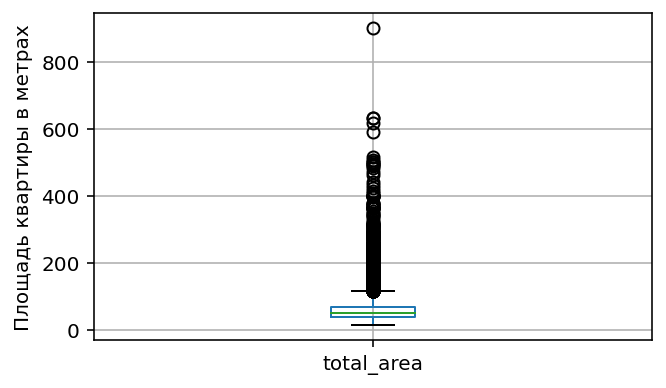

In [73]:
data.boxplot(column=['total_area'], figsize=(5,3), grid=True)#диаграмма размаха
plt.ylabel('Площадь квартиры в метрах')
plt.show()

Для дальнейшего анализа уберём высокие значения площади свыше 100 кв.м.

In [74]:
data_ta = data.query('total_area < 100')#в новой таблице исключим высокие значения

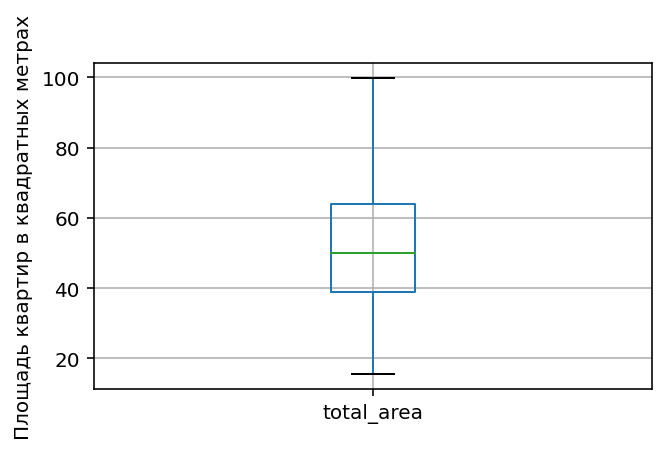

In [75]:
data_ta.boxplot(column=['total_area'], figsize=(5,3), grid=True)#диаграмма размаха после исключения
plt.ylabel('Площадь квартир в квадратных метрах')
plt.show()

In [76]:
data_ta['total_area'].describe()

count    21486.000000
mean        52.895112
std         17.266566
min         15.500000
25%         39.000000
50%         50.000000
75%         64.000000
max         99.900000
Name: total_area, dtype: float64

Построим гистограмму

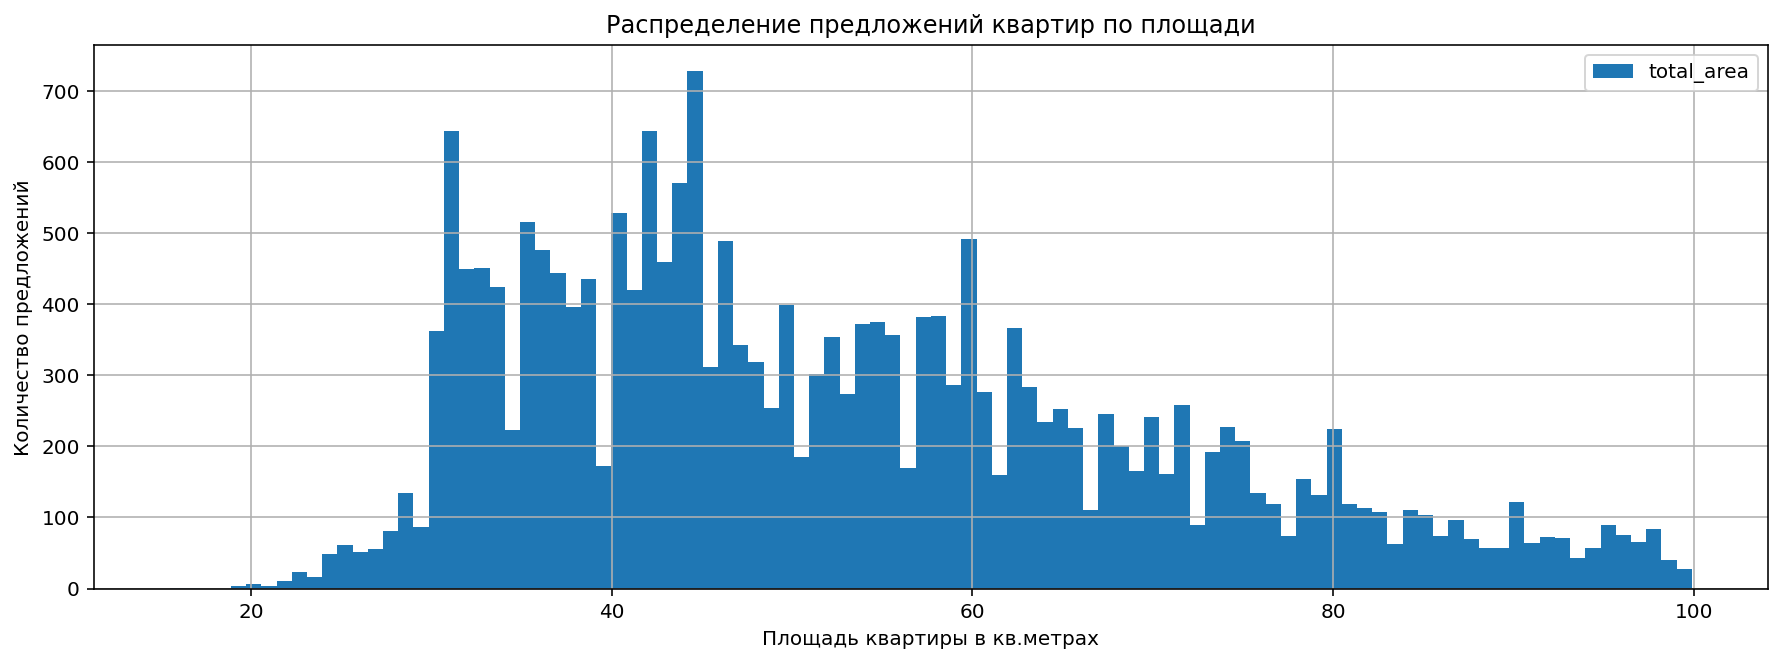

In [77]:
data_ta.sort_values(by='total_area', ascending=True)\
    .plot(kind='hist', y='total_area',title='Распределение предложений квартир по площади',bins=100, figsize=(15,5), grid=True)
        
plt.xlabel('Площадь квартиры в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

Самые высокое количество предложений по недвижимости c общей площадью около 45 кв. Медианное значение общей площади - 52 кв.м. На гистограмме видно, что резкое увеличение количества объектов с 30 кв.м и снижение около 67 кв.м.(1 и 2 комнатные квартиры - самые часто продаваемые). 

#### Жилая площадь

In [78]:
data['living_area'].describe()

count    23371.000000
mean        34.617091
std         22.340880
min          2.000000
25%         19.000000
50%         30.000000
75%         42.185000
max        409.700000
Name: living_area, dtype: float64

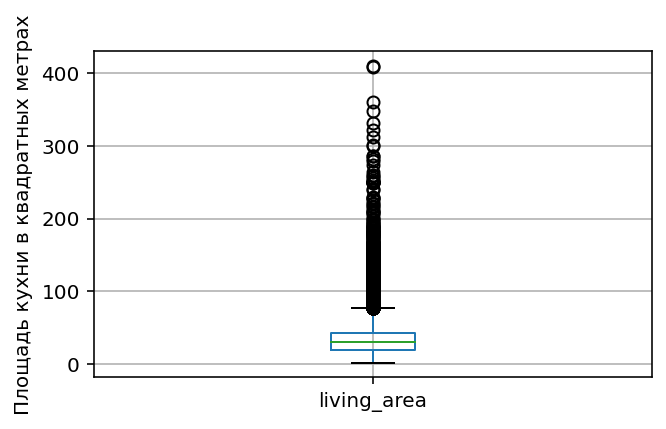

In [79]:
data.boxplot(column=['living_area'], figsize=(5,3), grid=True)#диаграмма размаха
plt.ylabel('Площадь кухни в квадратных метрах')
plt.show()

In [80]:
data_la = data.query('living_area > 0 & living_area < 70')#в новой таблице отбросим нулевые значения и выдающиеся

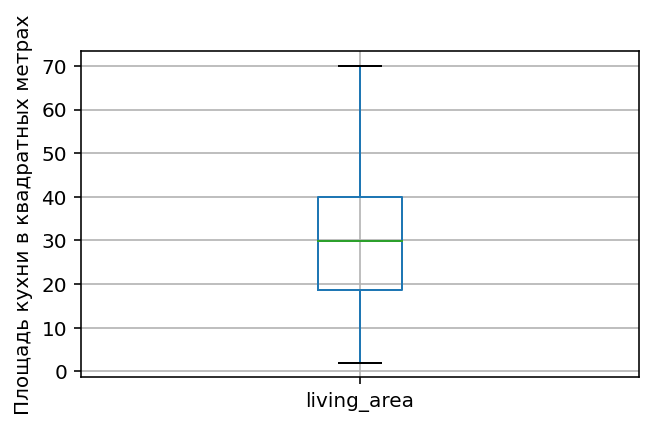

In [81]:
data_la.boxplot(column=['living_area'], figsize=(5,3), grid=True)#диаграмма размаха после исключения
plt.ylabel('Площадь кухни в квадратных метрах')
plt.show()

In [82]:
data_la['living_area'].describe()

count    22216.000000
mean        31.034532
std         13.000092
min          2.000000
25%         18.600000
50%         29.800000
75%         40.000000
max         69.965426
Name: living_area, dtype: float64

In [83]:
print('Коэффициент корреляции общей и жилой площади:', data_la['total_area'].corr(data_la['living_area']))

Коэффициент корреляции общей и жилой площади: 0.8942585206629575


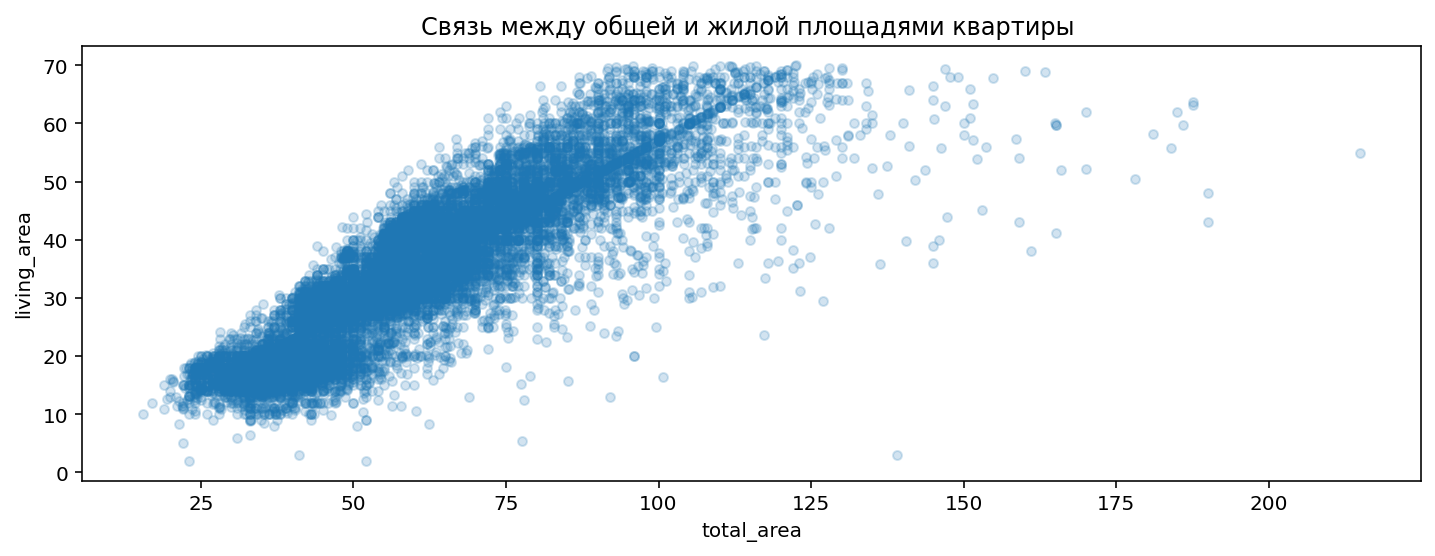

In [84]:
data_la.plot.scatter('total_area', 'living_area', figsize=(12,4), alpha=0.2)#для наглядности смотреть будем площади менее 110 кв.м. 
plt.title('Связь между общей и жилой площадями квартиры ')
plt.show()

Взаимосвязь двух величин очевидна. Если общая площадь увеливается, то и с ней увеличивается жилая площадь. 
Медианное значение жилой площади - 30 кв.м.

#### Площадь кухни

In [85]:
print(data['kitchen_area'].describe())

count    23371.000000
mean        10.505502
std          5.996136
min          2.713588
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


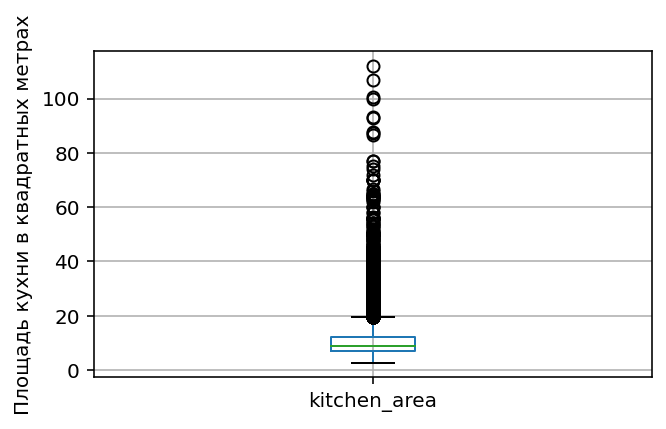

In [86]:
data.boxplot(column=['kitchen_area'], figsize=(5,3), grid=True)#диаграмма размаха после исключения
plt.ylabel('Площадь кухни в квадратных метрах')
plt.show()

In [87]:
data_ka = data.query('kitchen_area > 0 & kitchen_area < 17')#в новой таблице отбросим нулевые и выдающиеся значения

In [88]:
data_ka['kitchen_area'].describe()

count    21458.000000
mean         9.191396
std          2.838917
min          2.713588
25%          7.000000
50%          9.000000
75%         11.000000
max         16.999316
Name: kitchen_area, dtype: float64

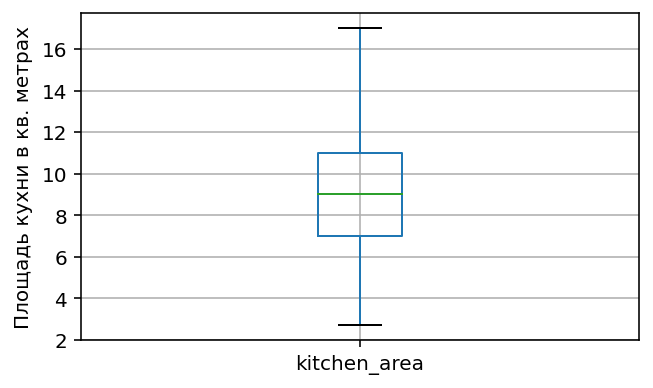

In [89]:
data_ka.boxplot(column=['kitchen_area'], figsize=(5,3), grid=True)#диаграмма размаха после исключения
plt.ylabel('Площадь кухни в кв. метрах')
plt.show()

In [90]:
print('Коэффициент корреляции общей площади и площади кухни:', data_ka['total_area'].corr(data_ka['kitchen_area']))

Коэффициент корреляции общей площади и площади кухни: 0.5018402442065414


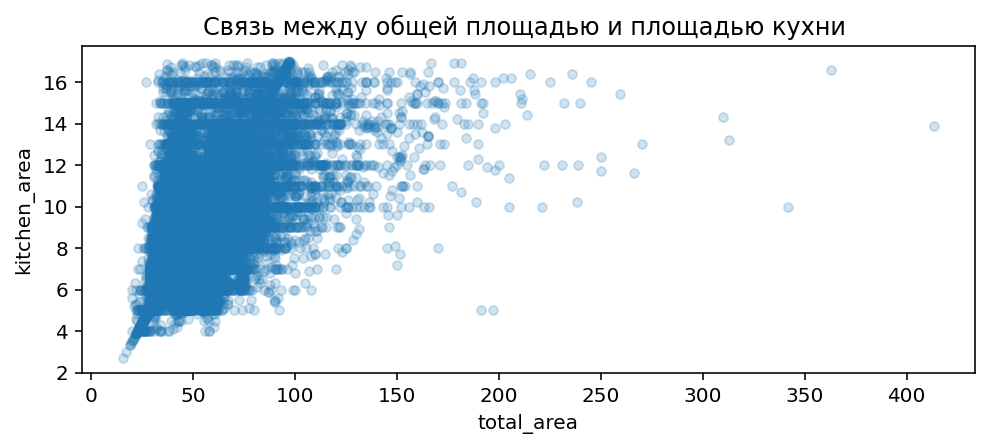

In [91]:
data_ka.plot.scatter('total_area', 'kitchen_area', figsize=(8,3), alpha=0.2)
plt.title('Связь между общей площадью и площадью кухни ')
plt.show()

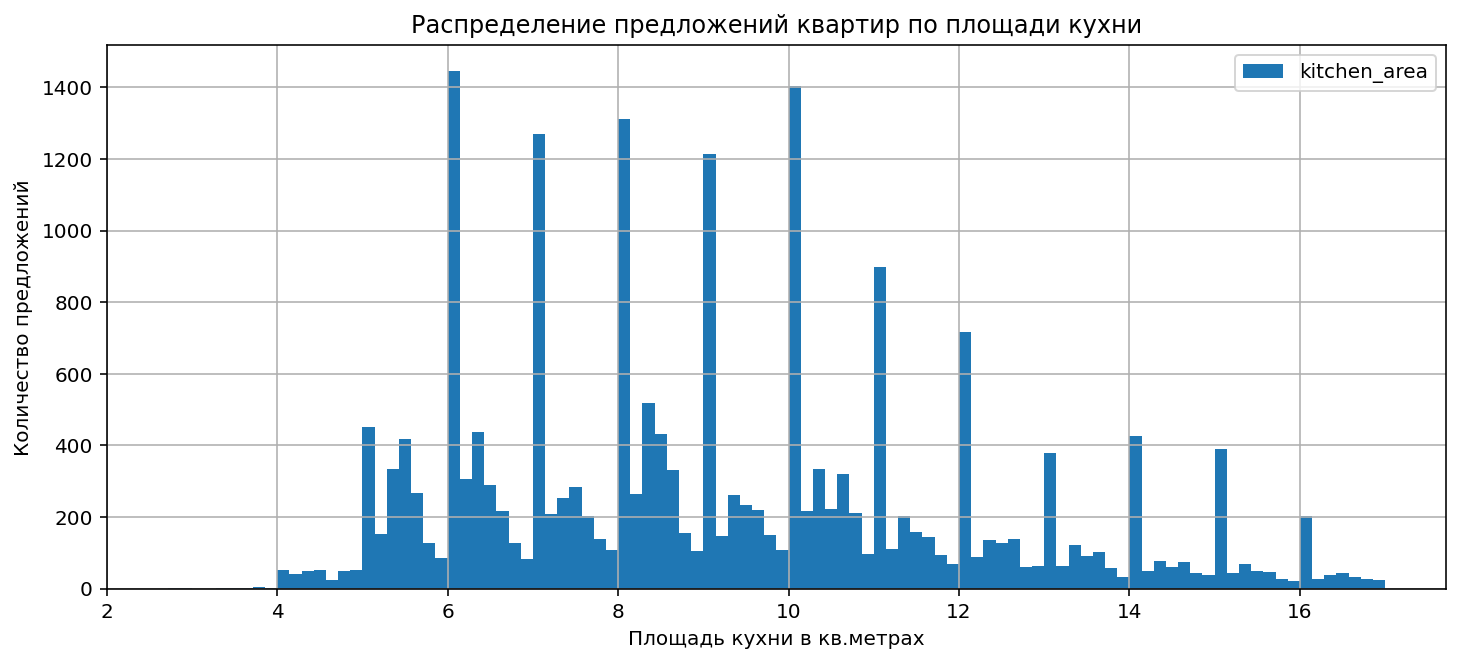

In [92]:
data_ka.sort_values(by='kitchen_area', ascending=True).plot(kind='hist', y='kitchen_area',title='Распределение предложений квартир по площади кухни',bins=100, figsize=(12,5), grid=True)
        
plt.xlabel('Площадь кухни в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

Взаимосвязь между общей площадью и площадью кухни ниже, чем с жилой. На графиках видно, что разброс площади кухни не такой большой. Основная часть объявлений предлагает кухню площадью от 7 до 12 кв.м. Медианное значение площади кухни - 9 кв.м.

#### Цена объекта

In [93]:
data['last_price'] = data ['last_price']/1000000
print(data['last_price'].describe())

count    23371.000000
mean         6.548479
std         10.898399
min          0.430000
25%          3.450000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64


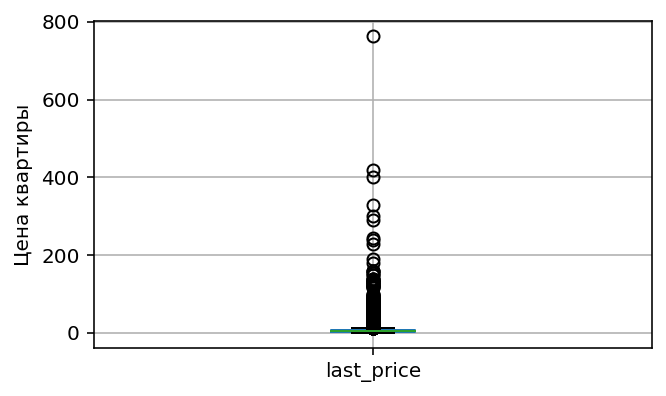

In [94]:
data.boxplot(column=['last_price'], figsize=(5,3), grid=True)#диаграмма размаха
plt.ylabel('Цена квартиры')
plt.show()

In [95]:
data_lp = data.query('last_price < 6.800000')#много значений находятся за 75 %, поэтому уберем их

In [96]:
print(data_lp['last_price'].describe())

count    17515.000000
mean         4.032286
std          1.360478
min          0.430000
25%          3.100000
50%          4.000000
75%          5.000000
max          6.799000
Name: last_price, dtype: float64


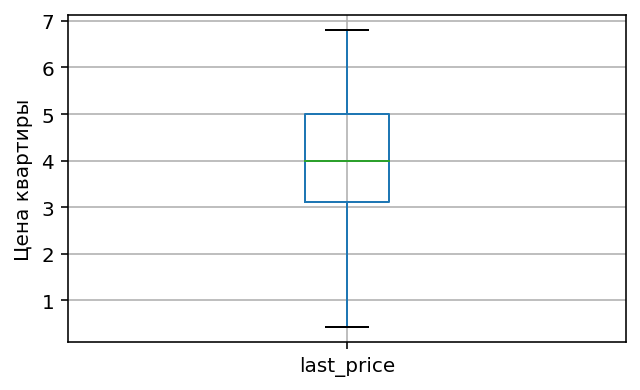

In [97]:
data_lp.boxplot(column=['last_price'], figsize=(5,3), grid=True)#диаграмма размаха после исключения
plt.ylabel('Цена квартиры')
plt.show()

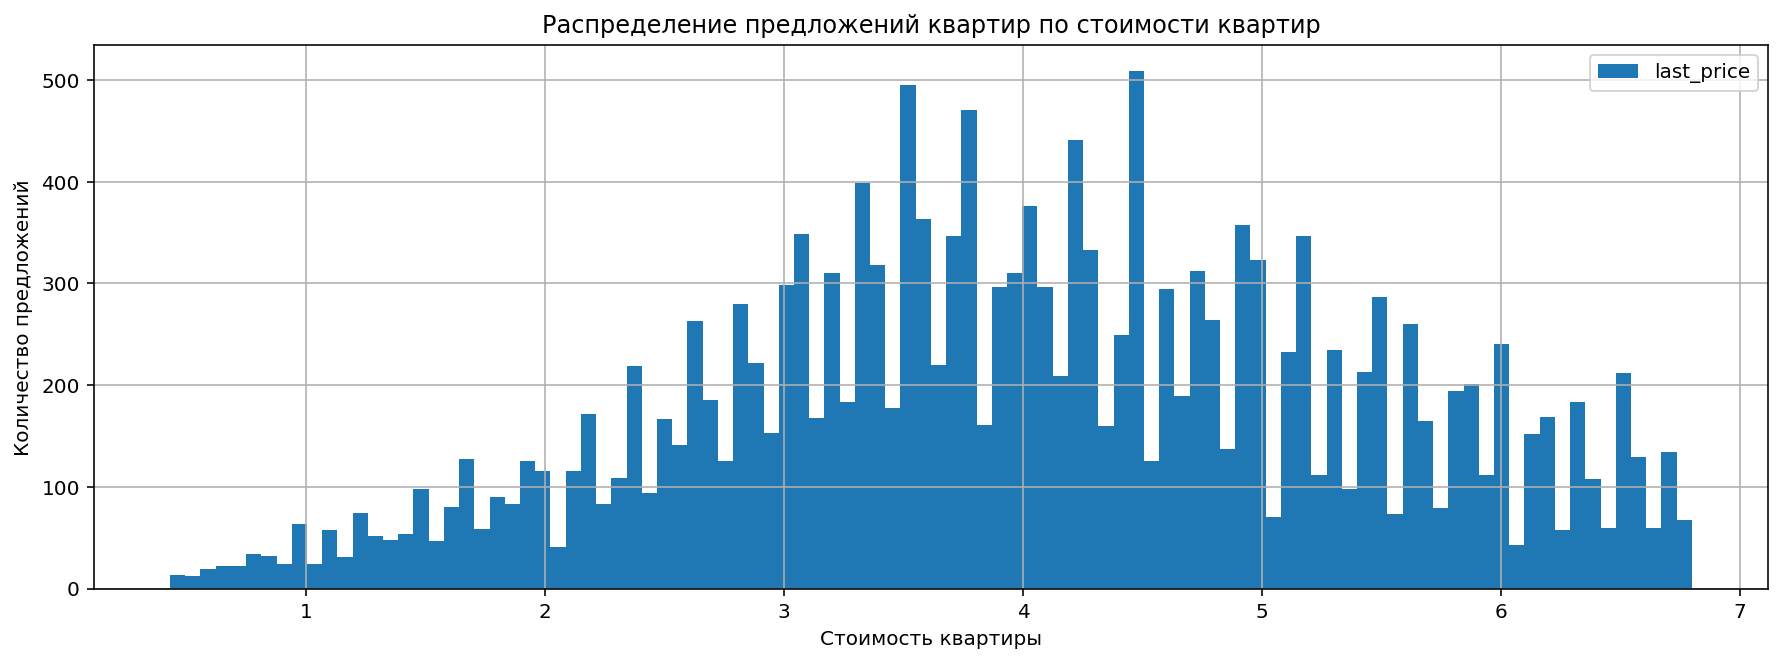

In [98]:
data_lp.sort_values(by='last_price', ascending=True).plot(kind='hist', y='last_price',title='Распределение предложений квартир по стоимости квартир',bins=100, figsize=(15,5), grid=True)
        
plt.xlabel('Стоимость квартиры')
plt.ylabel('Количество предложений')
plt.show()

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Сделано ✔️
<br>
</div>

 Наиболее популярная цена квартир в пределах 4,5 млн. рублей. Медианное значение стоимости квартиры- 4 млн руб.

#### Количество комнат

In [99]:
print(data['rooms'].describe())

count    23371.000000
mean         2.076248
std          1.077051
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


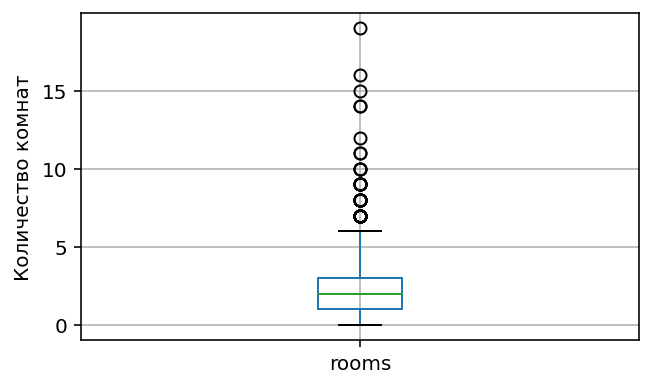

In [100]:
data.boxplot(column=['rooms'], figsize=(5,3), grid=True)#диаграмма размаха 
plt.ylabel('Количество комнат')
plt.show()

Здесь можно не отсекать выдающиеся значения. По графику можно дать однозначный вывод, что 1 и 2х комнатные квартиры это наиболее распространенный вариант в объявлениях.

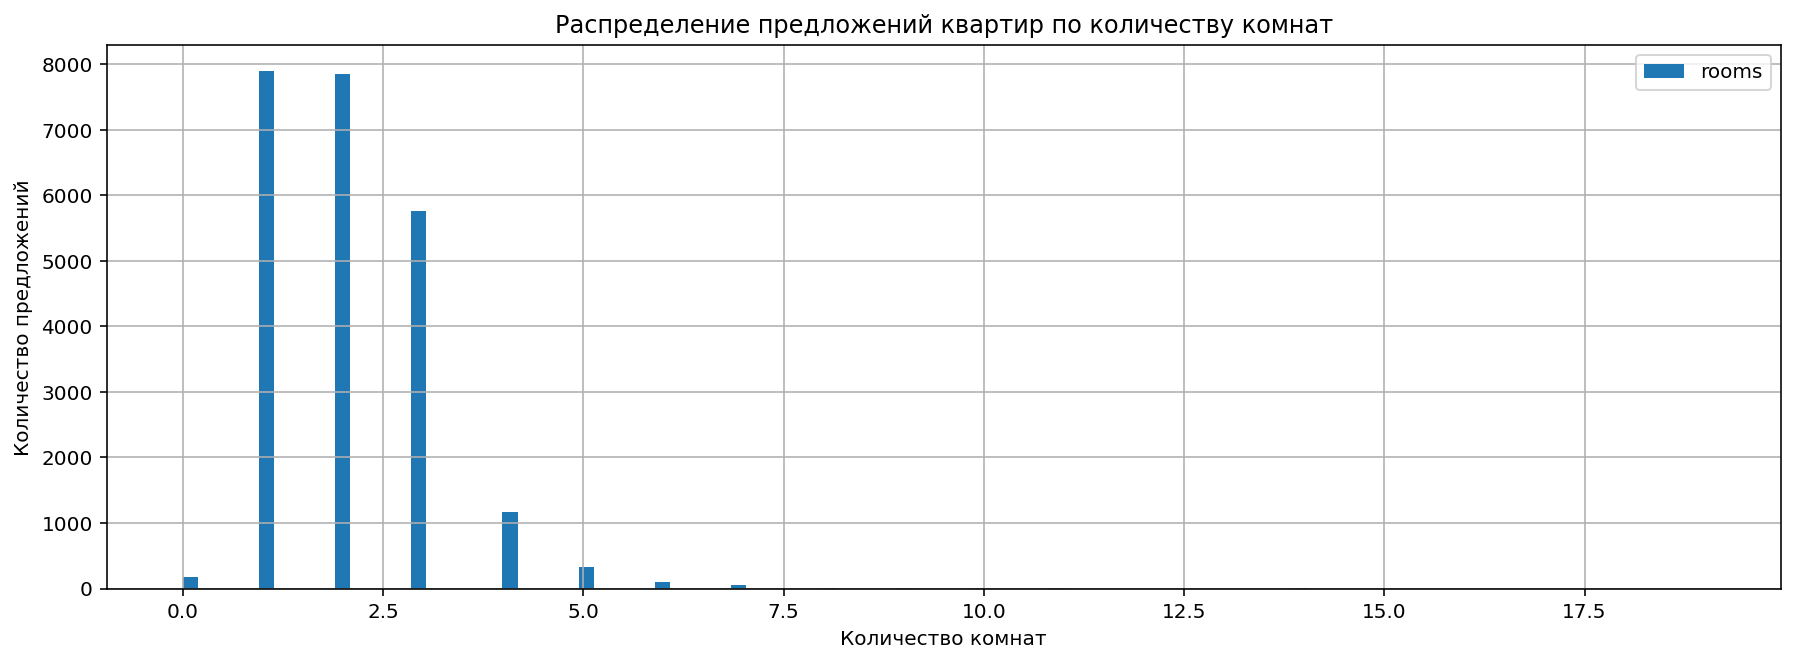

In [101]:
data.sort_values(by='rooms', ascending=True).plot(kind='hist', y='rooms',title='Распределение предложений квартир по количеству комнат',bins=100, figsize=(15,5), grid=True)
        
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()

Здесь наше предположение подтвердилось. 1 и 2-комнатные самые популярные. Также есть другие варианты до 16 комнат, но их количество невелико.

#### Высота потолков

In [102]:
data['ceiling_height'].describe()

count    23371.000000
mean         2.696539
std          0.220334
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

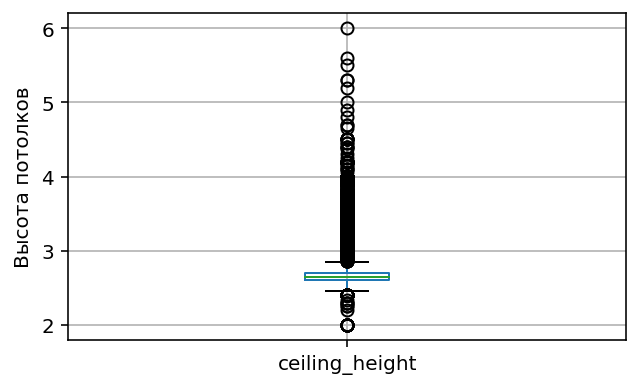

In [103]:
data.boxplot(column=['ceiling_height'], figsize=(5,3), grid=True)#диаграмма размаха
plt.ylabel('Высота потолков')
plt.show()

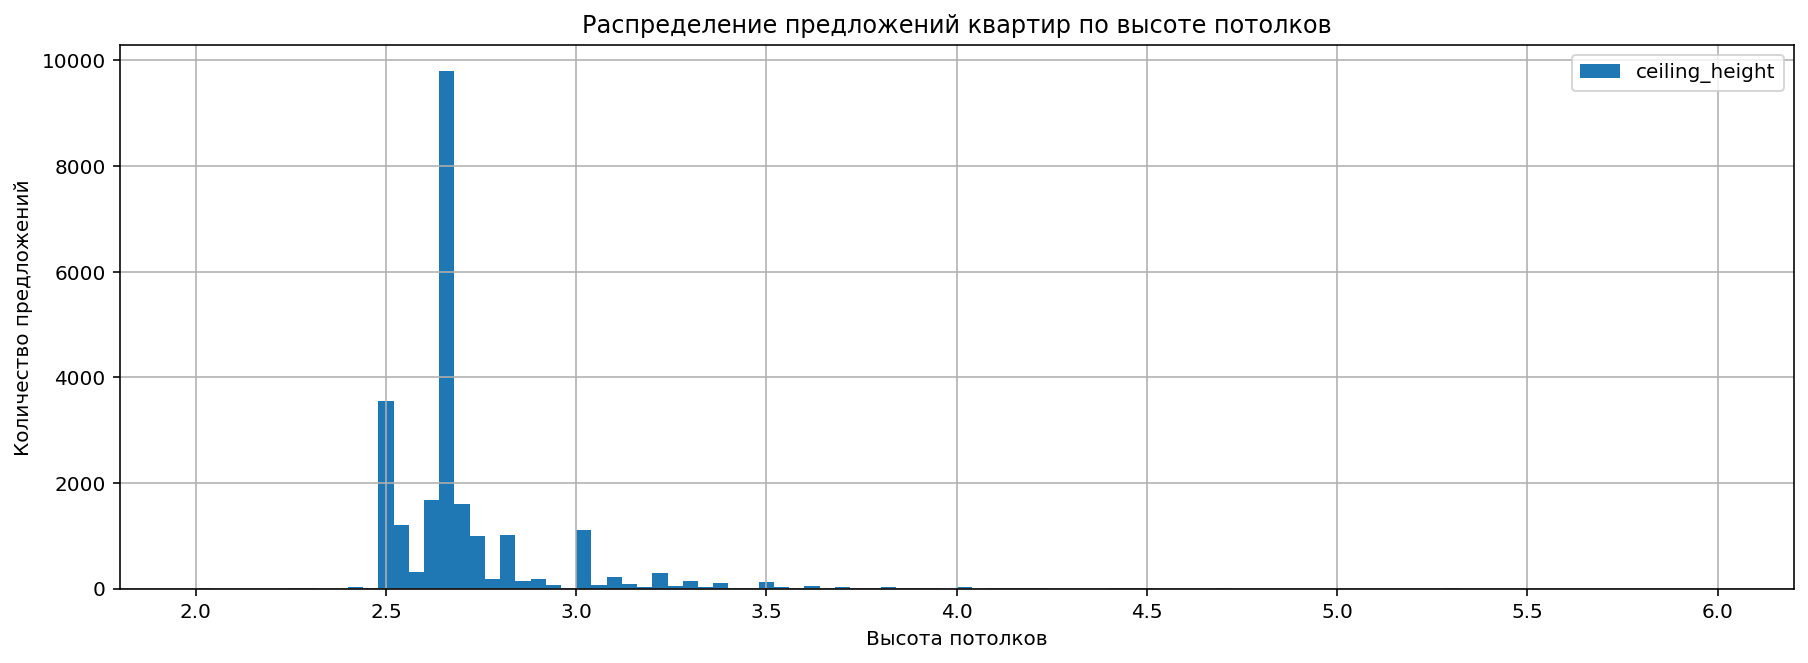

In [104]:
data.sort_values(by='ceiling_height', ascending=True).plot(kind='hist', y='ceiling_height',title='Распределение предложений квартир по высоте потолков',bins=100, figsize=(15,5), grid=True)
        
plt.xlabel('Высота потолков')
plt.ylabel('Количество предложений')
plt.show()

Наиболее популярная высота потолков 2.6 м. Потолки выше 2.8 это уже редкость, но они есть до 6 м включительно. Медианное значение высоты потолков - 2.65.

#### Этаж квартиры

In [105]:
data['floor'].describe()

count    23371.000000
mean         5.867100
std          4.859116
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

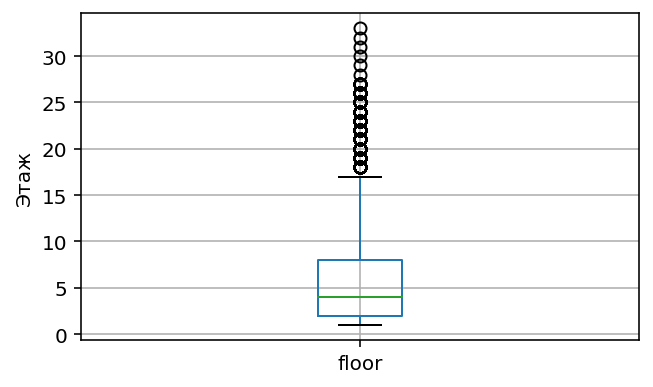

In [106]:
data.boxplot(column=['floor'], figsize=(5,3), grid=True)#диаграмма размаха
plt.ylabel('Этаж')
plt.show()

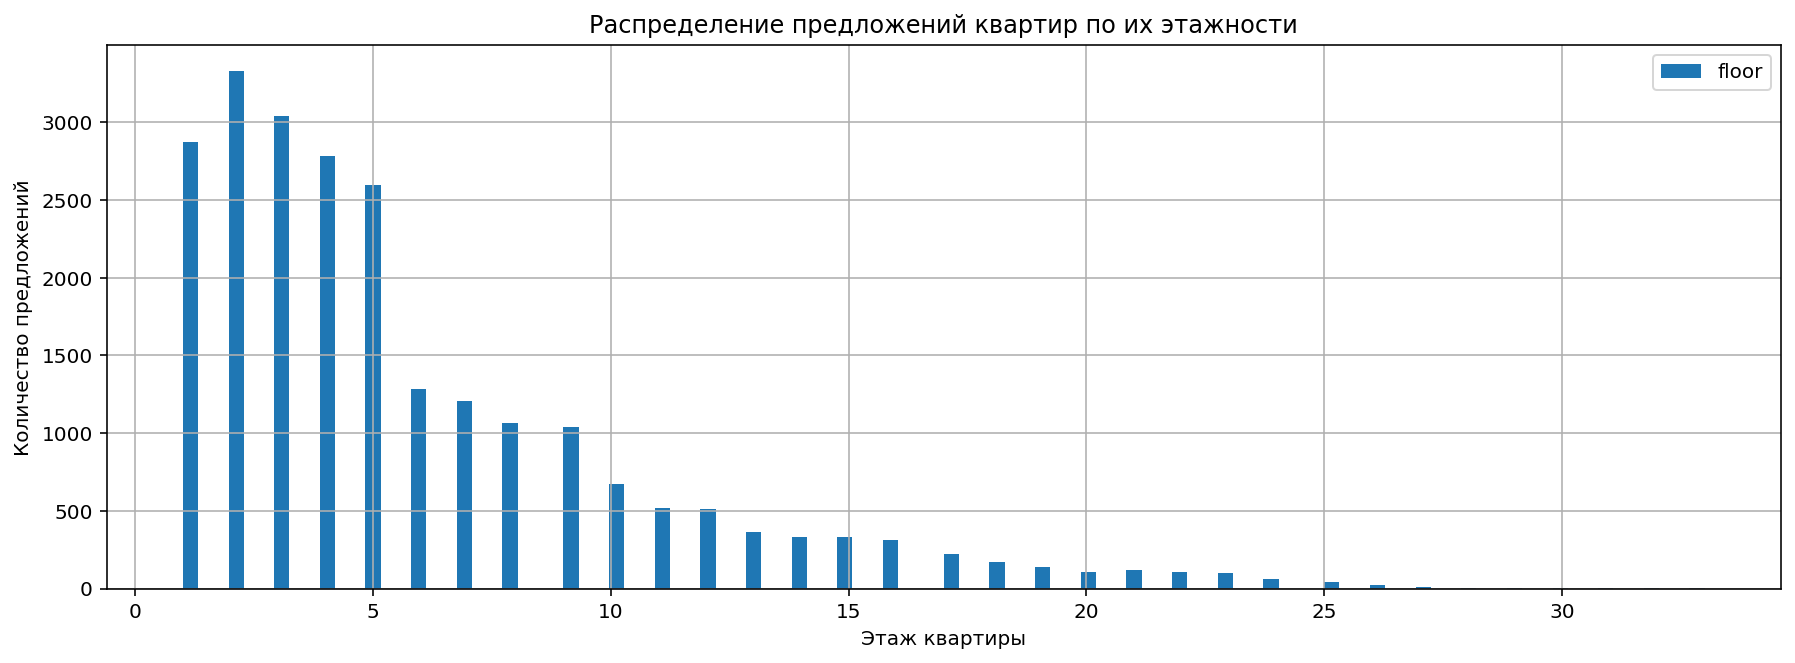

In [107]:
data.sort_values(by='floor', ascending=True).plot(kind='hist', y='floor',title='Распределение предложений квартир по их этажности',bins=100, figsize=(15,5), grid=True)
        
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество предложений')
plt.show()

Наиболее популярные этажи - 2 и 3 этажи. Медианное значение - 4 этаж. Популярность предложений с 1 по 5 этаж можно предположить из-за большого количества домов в 5 этажей.

#### Oбщее количество этажей в доме

In [108]:
data['floors_total'].describe()

count    23371.000000
mean        10.655556
std          6.568618
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

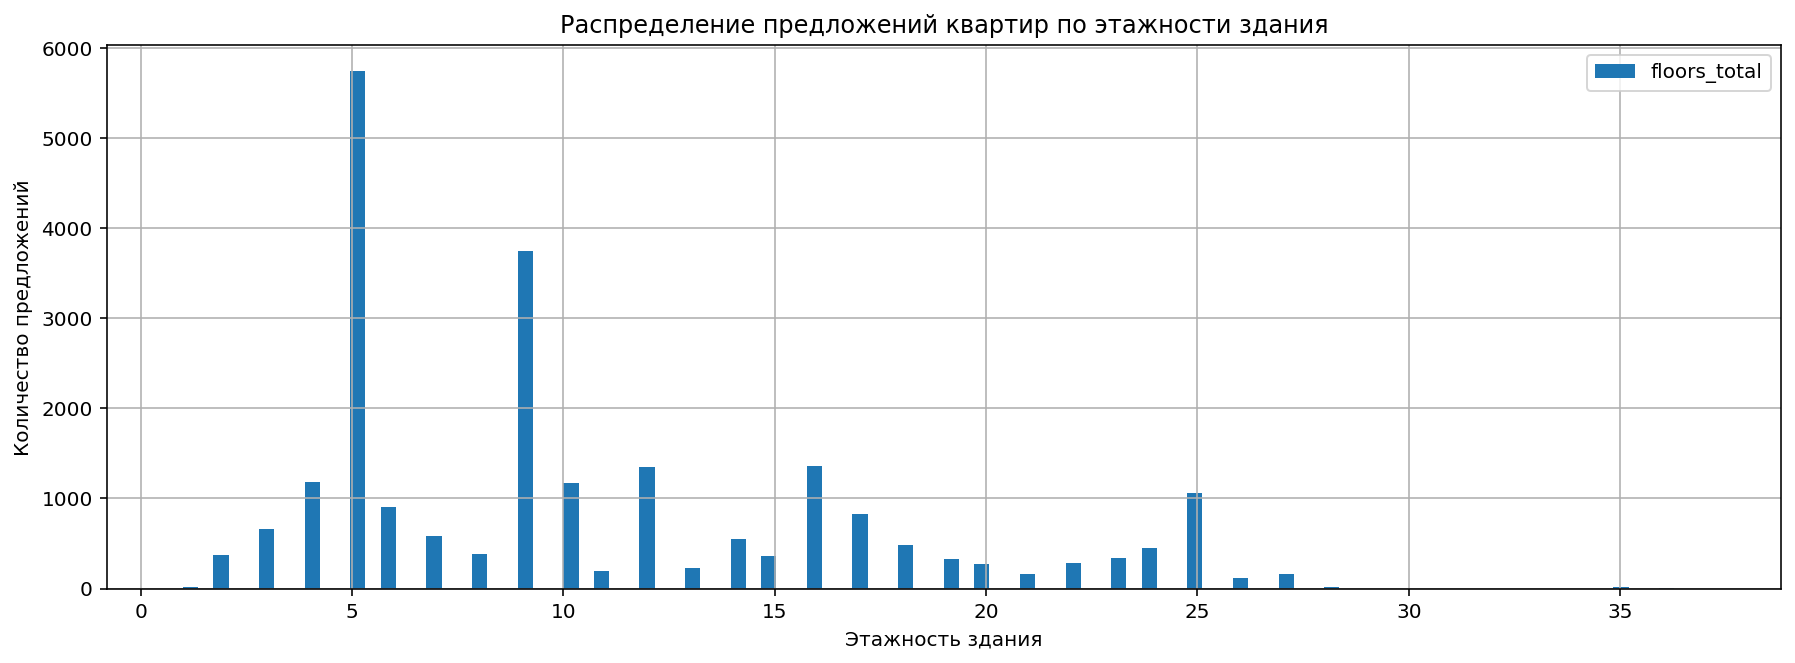

In [109]:
data.sort_values(by='floors_total', ascending=True).plot(kind='hist', y='floors_total',title='Распределение предложений квартир по этажности здания',bins=100, figsize=(15,5), grid=True)
        
plt.xlabel('Этажность здания')
plt.ylabel('Количество предложений')
plt.show()

Предположение о том, что большинство квартир продаются в 5-этажном доме подтвердилась. Вторые по популярности 9-этажные здания.

#### Тип этажа квартиры

In [110]:
data.groupby('floor_type')['floor_type'].agg('count')

floor_type
другой       17197
первый        2852
последний     3322
Name: floor_type, dtype: int64

Самый популярный этаж - это не последний и не первый. Это и логично других этажей больше в принципе и соответственно предложений по ним больше.

#### Расстояние до центра города в метрах

Так как в данных информация и по ЛО и по городу Санкт-Петербургу, то правильнее будет анализировать информацию о расстоянии раздельно.

In [111]:
lo_data = data.query('locality_name != "санкт-петербург"')

In [112]:
spb_data = data.query('locality_name == "санкт-петербург"')

In [113]:
lo_data['city_centers_nearest'].describe()#Ленинградская область

count     2462.000000
mean     30607.110073
std       9070.443289
min      17012.000000
25%      24769.750000
50%      30373.000000
75%      33709.750000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [114]:
spb_data['city_centers_nearest'].describe()#данные сильно отличаются от области

count    15473.000000
mean     11594.243973
std       4827.664762
min        181.000000
25%       8328.000000
50%      12242.000000
75%      14942.000000
max      29493.000000
Name: city_centers_nearest, dtype: float64

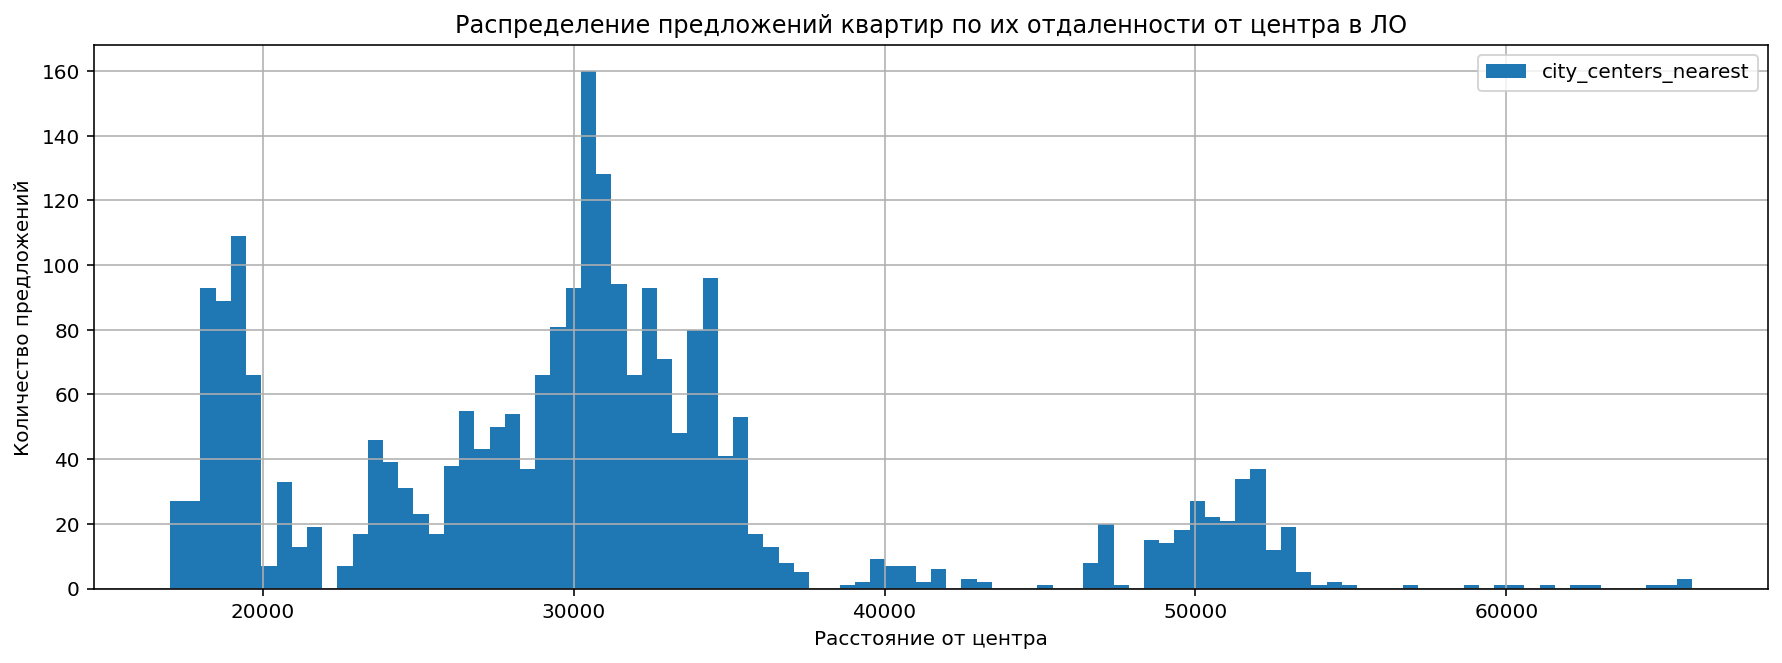

In [115]:
lo_data.sort_values(by='city_centers_nearest', ascending=True).plot(kind='hist', y='city_centers_nearest',title='Распределение предложений квартир по их отдаленности от центра в ЛО',bins=100, figsize=(15,5), grid=True)
        
plt.xlabel('Расстояние от центра')
plt.ylabel('Количество предложений')
plt.show()

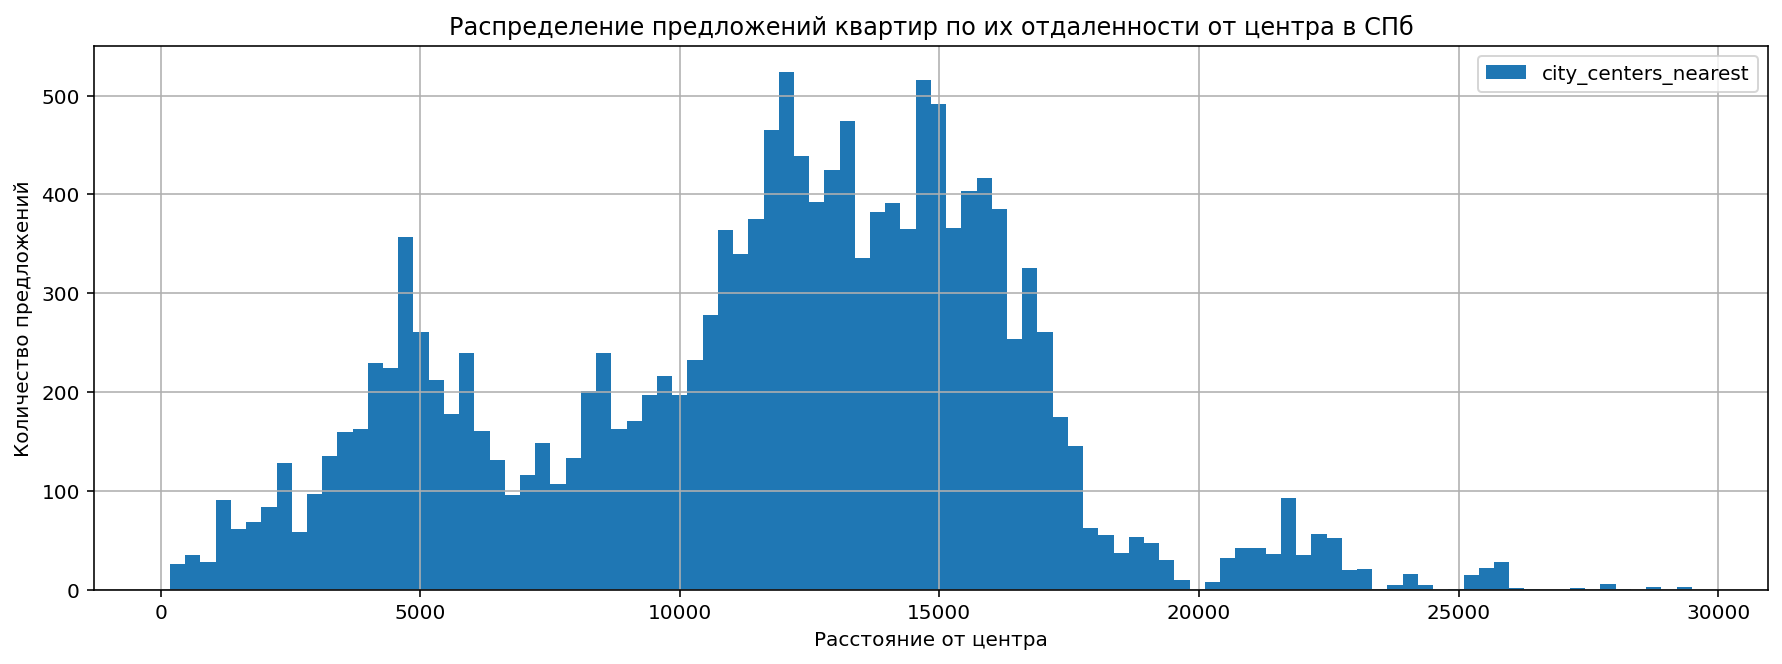

In [116]:
spb_data.sort_values(by='city_centers_nearest', ascending=True).plot(kind='hist', y='city_centers_nearest',title='Распределение предложений квартир по их отдаленности от центра в СПб',bins=100, figsize=(15,5), grid=True)
        
plt.xlabel('Расстояние от центра')
plt.ylabel('Количество предложений')
plt.show()

На графиках видно, что предложений по отдаленности от центра города большего всего в ЛО в районе 30 км и в СПб - 12-16 км.
Медианное значение для ЛО - 30 км.
Медианное значение для СПб - 12 км.

#### Расстояние до ближайшего аэропорта

In [117]:
lo_data['airports_nearest'].describe()#Ленинградская область

count     2463.000000
mean     33542.752335
std      17258.788445
min       9294.000000
25%      18542.000000
50%      26711.000000
75%      52610.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [118]:
spb_data['airports_nearest'].describe()#здесь разница небольшая

count    15449.000000
mean     28059.383585
std      11552.834446
min       6450.000000
25%      18578.000000
50%      26784.000000
75%      36606.000000
max      54784.000000
Name: airports_nearest, dtype: float64

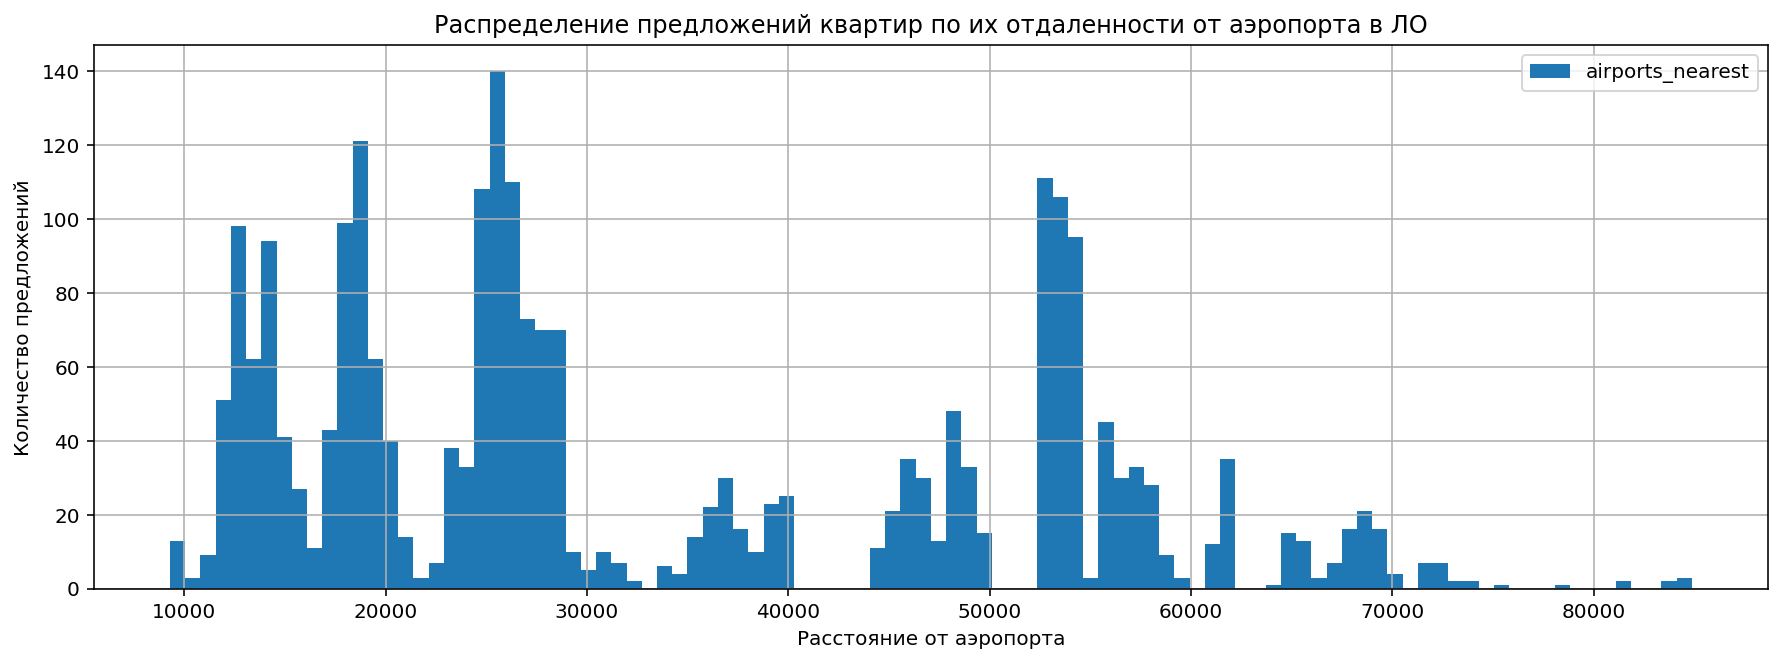

In [119]:
lo_data.sort_values(by='airports_nearest', ascending=True).plot(kind='hist', y='airports_nearest',title='Распределение предложений квартир по их отдаленности от аэропорта в ЛО',bins=100, figsize=(15,5), grid=True)
        
plt.xlabel('Расстояние от аэропорта')
plt.ylabel('Количество предложений')
plt.show()

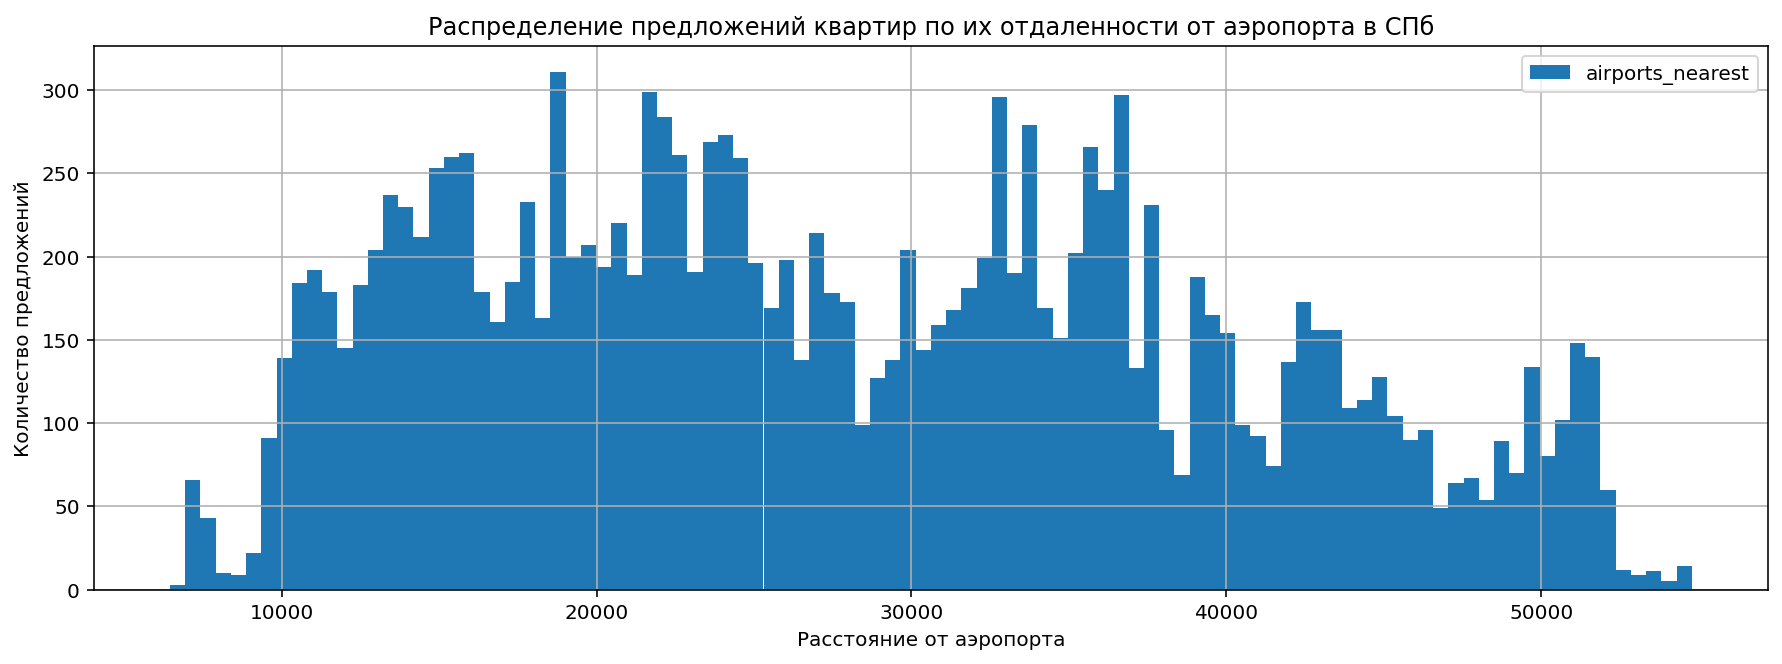

In [120]:
spb_data.sort_values(by='airports_nearest', ascending=True).plot(kind='hist', y='airports_nearest',title='Распределение предложений квартир по их отдаленности от аэропорта в СПб',bins=100, figsize=(15,5), grid=True)
        
plt.xlabel('Расстояние от аэропорта')
plt.ylabel('Количество предложений')
plt.show()

Для ЛО большее количество предложений в районе 26 км до аэропорта. Для Санкт-Петербурга наиболее популярная близость к аэропорту начинается с 12 км. Медианное значение и для ЛО и для СПб - 27 км.

#### Расстояние до ближайшего парка

In [121]:
data['parks_nearest'].describe()

count    7977.000000
mean      490.618528
std       340.942457
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

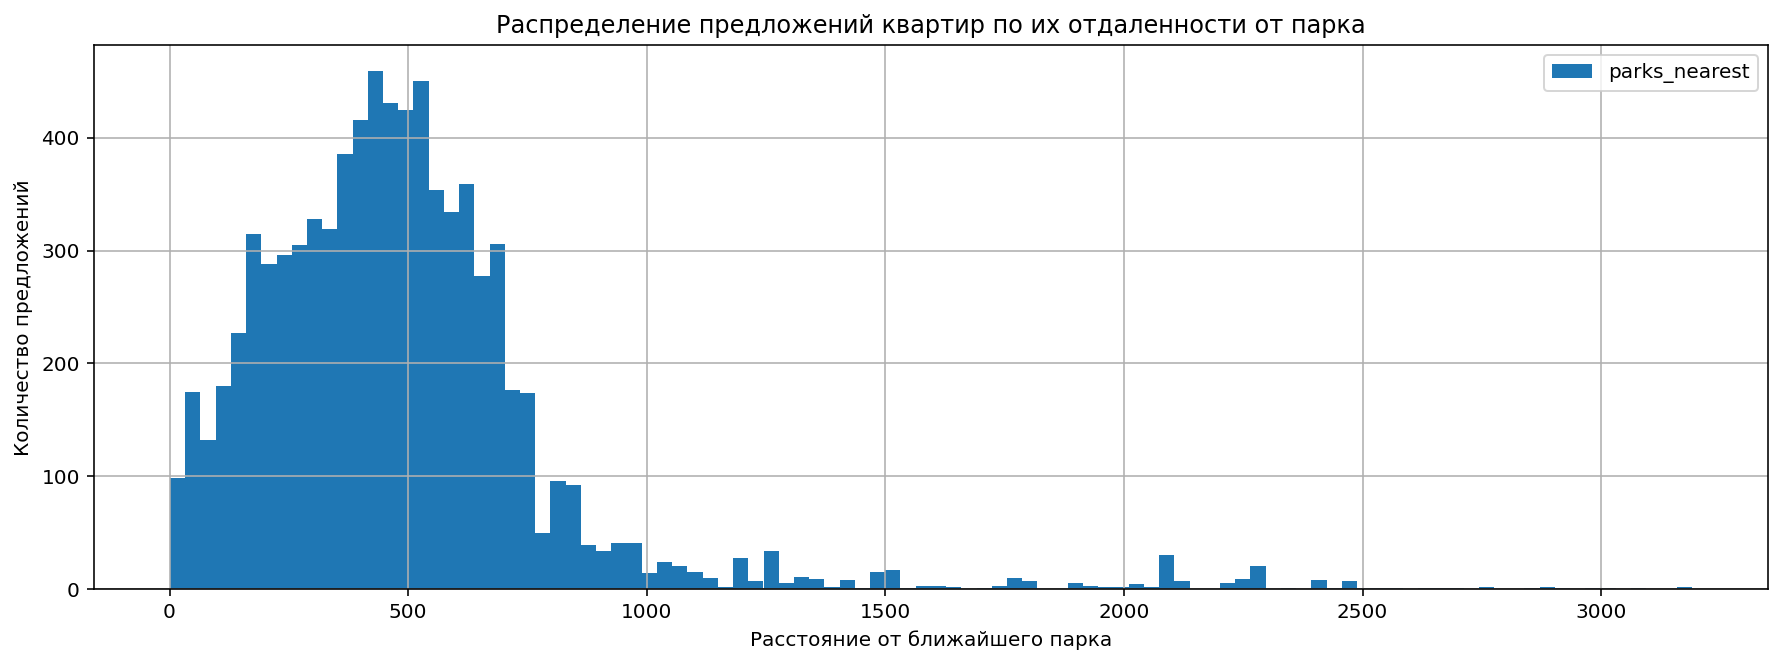

In [122]:
data.sort_values(by='parks_nearest', ascending=True).plot(kind='hist', y='parks_nearest',title='Распределение предложений квартир по их отдаленности от парка',bins=100, figsize=(15,5), grid=True)
        
plt.xlabel('Расстояние от ближайшего парка')
plt.ylabel('Количество предложений')
plt.show()

 В большинстве случаев парк находится в районе 500 м. Медианное значение - 455 м.

#### День и месяц публикации объявления

In [123]:
data.groupby('day_exposition')['day_exposition'].agg('count')

day_exposition
0    3560
1    4129
2    3909
3    4246
4    3955
5    1906
6    1666
Name: day_exposition, dtype: int64

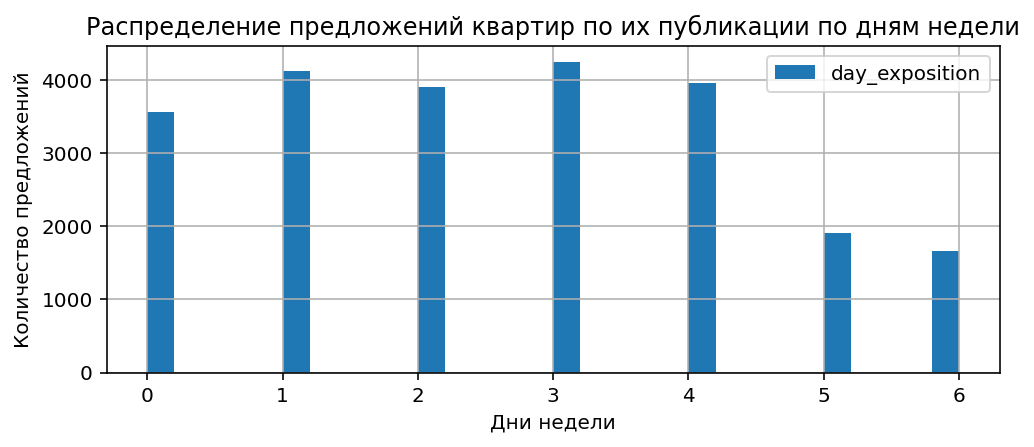

In [124]:
data.sort_values(by='day_exposition', ascending=True).plot(kind='hist', y='day_exposition',title='Распределение предложений квартир по их публикации по дням недели',bins=30, figsize=(8,3), grid=True)
        
plt.xlabel('Дни недели')
plt.ylabel('Количество предложений')
plt.show()

В основном объявления выставляют по вторникам и четвергам. Самые неактивные - суббота и воскресенье.

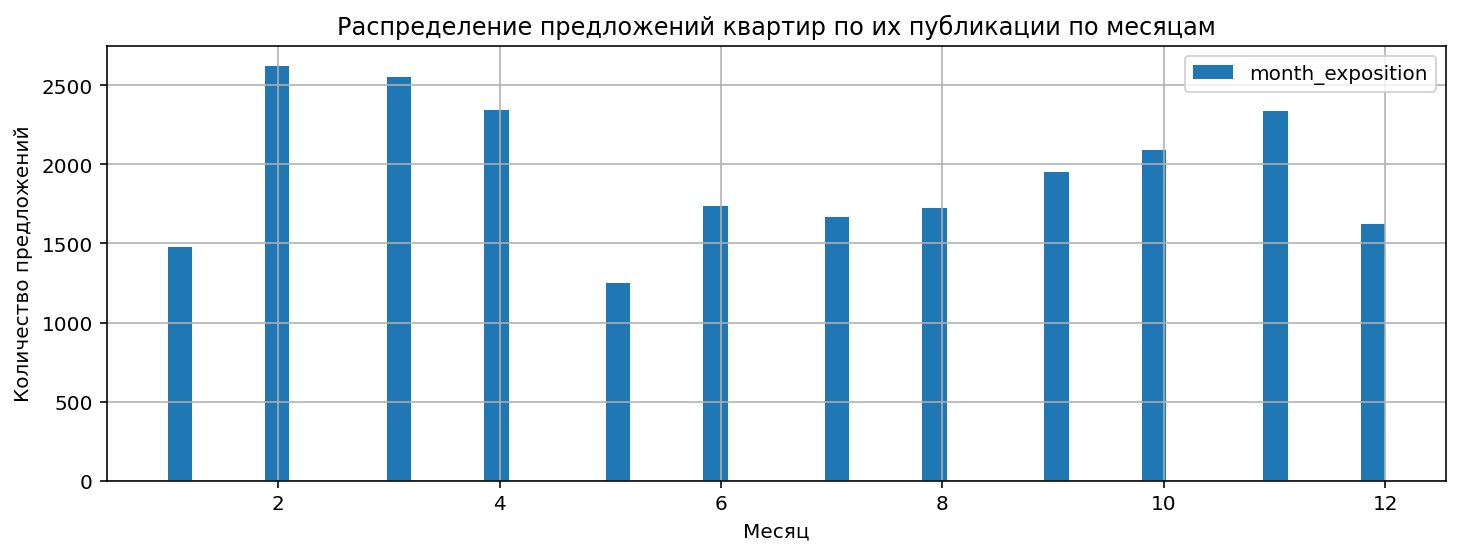

In [125]:
data.sort_values(by='month_exposition', ascending=True).plot(kind='hist', y='month_exposition',title='Распределение предложений квартир по их публикации по месяцам',bins=50, figsize=(12,4), grid=True)
        
plt.xlabel('Месяц')
plt.ylabel('Количество предложений')
plt.show()

Большая часть объявлений выставлена в феврале и марте. Объяснить можно тем, что длительные праздники закончились, время отпусков не началось, люди переходят к решениям жилищных вопросов.

#### *Вывод по разделу*:
    

Исходя из медианных значений можно выделить параметры самого распространенного варианта квартиры в ЛО и СПб:
    
    - общая площадь 52 кв.м (жилая площадь 30 кв.м. и кухня 9 кв.м.);
    - с 2 комнатами;
    - высота потолков 2.65 м;
    - этаж квартиры 4ый в 9 этажном доме;
    - расстояние до центра города в ЛО - 30 км., в СПб - 12 км;
    - расстояние до аэропорта 27 км;
    - расстояние до парка 455 м;
    - цена 4 млн руб.
    
Вывод по параметрам: 

- Площадь
Большинство квартир с общей площадью от 40 кв.м. до 70 кв.м. Свыше 100 кв.м. - редкие значения. 

- Жилая площадь
Большинство квартир с жилой площадью от 19 кв.м. до 42 кв.м. Свыше 70 кв.м. - редкие значения. 

- Площадь кухни
Большинство квартир с площадью кухни от 7 кв.м. до 12 кв.м. Свыше 17 кв.м. - редкие значения. 

- Стоимость
Стоимость основной части квартир составляет от 3,45 млн. руб. до 6,8 млн.руб. Свыше 7 млн. руб. - редкие значения. 

- Комнаты
В основном квартиры состоят из 1, 2 и 3 комнат. Больше 6 комнат - редкие значения.

- Высота потолков
Большинство вариантов имеют высоту потолков от 2,6 до 2,7 метров. Больше 3 м - редкие значения.

- Этажность здания
Большая часть зданий в районе от 5 до 16 этажей. Больше 25 - редкие значения.

- День и месяц публикации
Основная часть объявлений опубликована со вторника по четверг. Самый неактивный день по публикации объявлений - воскресенье.
Самыми активными месяцами по публикации являются февраль, март, апрель и ноябрь. Самым неактивным - май (время отпусков, праздников, дач).

Также при анализе параметров было выявлено, что пропущенные или нулевые значения в строках оказывали не сильное влияние на основные показатели объектов недвижимости (квартили, медианы, средние).    


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! Отдельный плюс за то, что ты подписываешь графики и их оси
</div>

#### Задание 1 

Изучите, как быстро продавались квартиры (столбец days_exposition)

In [126]:
data['days_exposition'].describe()

count    20217.000000
mean       181.201761
std        220.109832
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

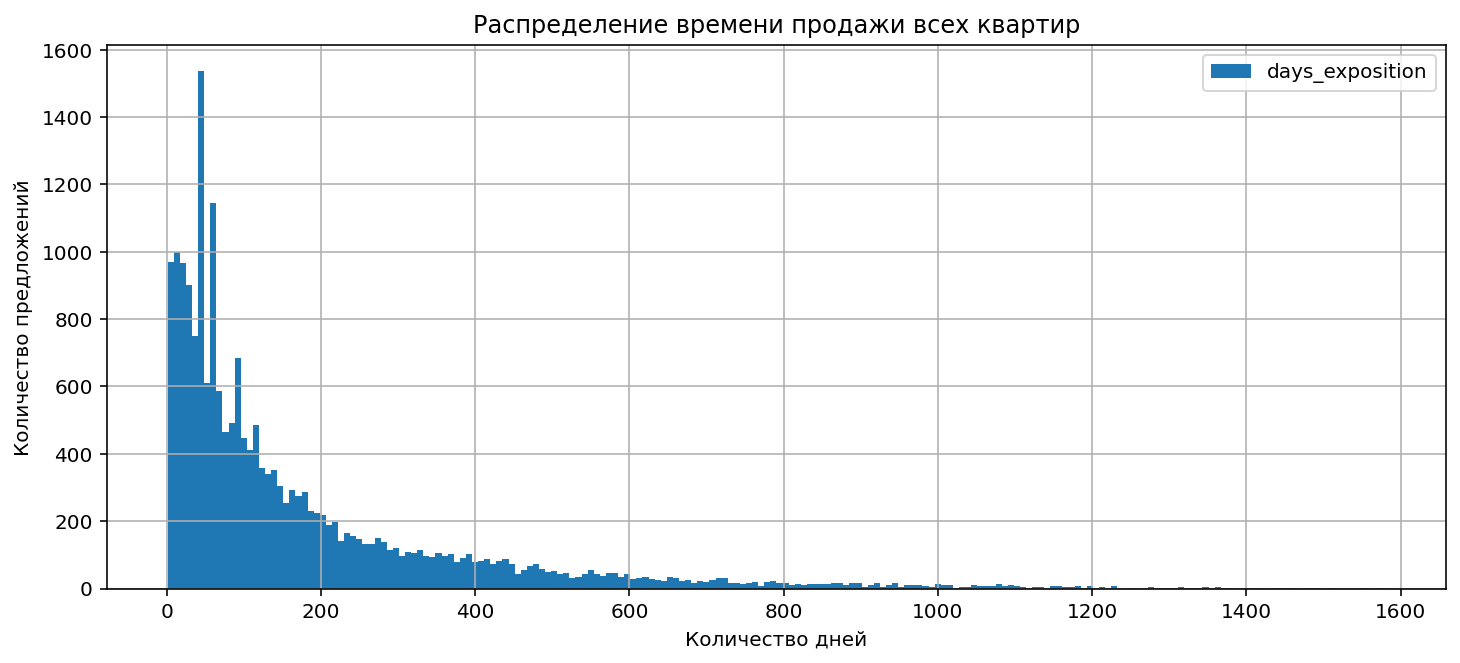

In [127]:
data.sort_values(by='days_exposition', ascending=True).plot(kind='hist', y='days_exposition',title='Распределение времени продажи всех квартир',bins=200, figsize=(12,5), grid=True)
        
plt.xlabel('Количество дней')
plt.ylabel('Количество предложений')
plt.show()

In [128]:
data[data['rooms'] < 7].pivot_table(index='rooms', values='days_exposition', aggfunc='median')

,days_exposition
rooms,
0,50.5
1,81.0
2,91.0
3,114.0
4,155.0
5,191.0
6,199.0


<AxesSubplot:title={'center':'Зависимость цены от длительности продажи'}, xlabel='цена', ylabel='количество дней'>

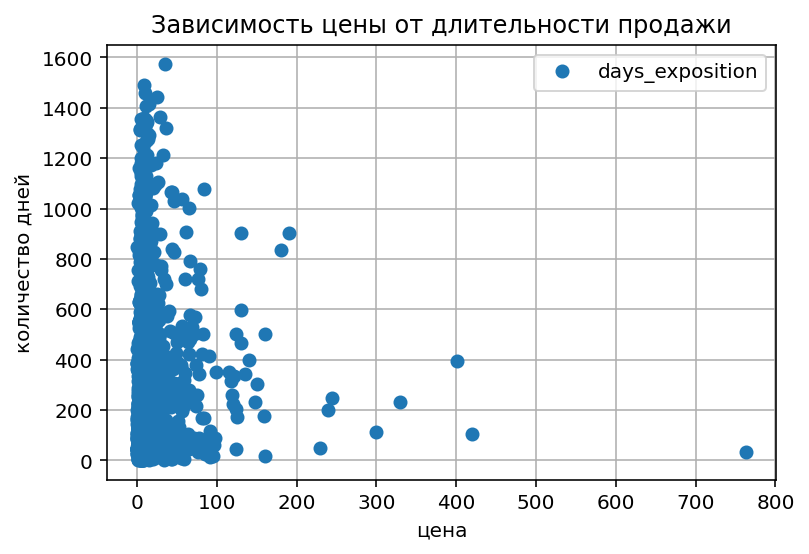

In [129]:
data.pivot_table(index='last_price', values='days_exposition', aggfunc='median').reset_index().plot(x='last_price', y='days_exposition', grid=True, style='o',title='Зависимость цены от длительности продажи', xlabel='цена', ylabel='количество дней')

*Вывод*

Среднее время продажи составляет 180 дней (6 месяцев). Медианное значение -  в течение 95 дней (3 месяца). Разница из-за выбивающихся значений свыше 7,5 мес. При этом четверть всех объектов недвижимости была продана в течение 45 дней с момента публикации. Самая длительная продажа - 1580 дней (4,5 года). Самая быстропродаваемая недвижимость - это студии и 1-комнатные квартиры.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен! Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

#### Задание 2 

Какие факторы больше всего влияют на общую (полную) стоимость объекта? 

In [130]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area']].corr() #коэффициенты корреляции 

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.653582,0.583805,0.515315
total_area,0.653582,1.000000,0.947306,0.661709
living_area,0.583805,0.947306,1.000000,0.501357
kitchen_area,0.515315,0.661709,0.501357,1.000000


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно построить компактную табличку выбрав все необходимые столбцы и применив к ним corr()

	df[['last_price', 'total_area', 'rooms', '...']].corr()
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Сделано ✔️
<br>
</div>

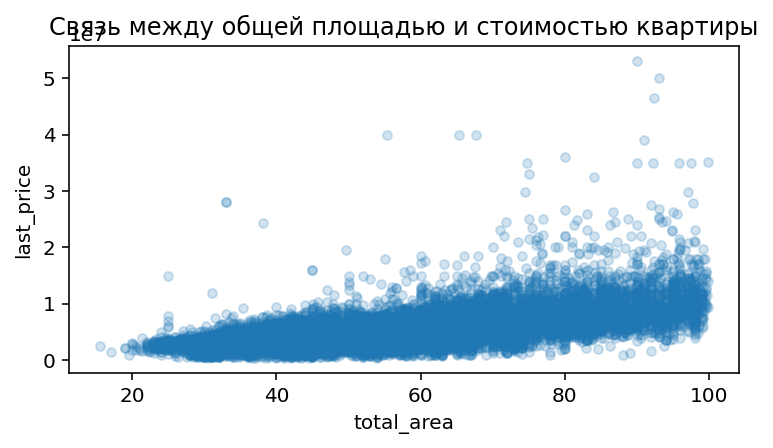

In [131]:
data_ta.plot.scatter('total_area', 'last_price', figsize=(6,3), alpha=0.2)#график взаимосвязи last_price и total_area
plt.title('Связь между общей площадью и стоимостью квартиры')
plt.show()

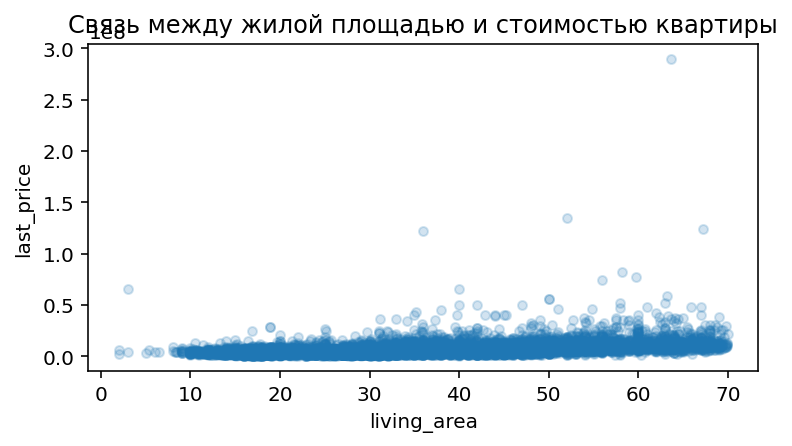

In [132]:
data_la.plot.scatter('living_area', 'last_price', figsize=(6,3), alpha=0.2)#график взаимосвязи last_price и living_area
plt.title('Связь между жилой площадью и стоимостью квартиры')
plt.show()

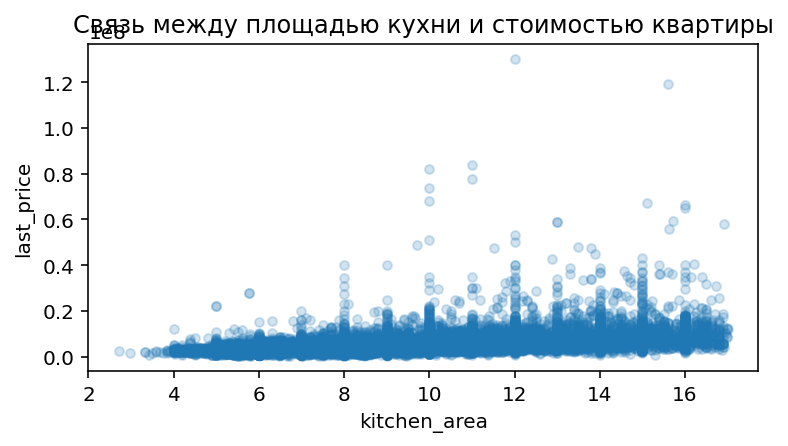

In [133]:
data_ka.plot.scatter('kitchen_area', 'last_price', figsize=(6,3), alpha=0.2)#график взаимосвязи last_price и kitchen_area
plt.title('Связь между площадью кухни и стоимостью квартиры')
plt.show()

Общая площадь имеет бОльшую взаимосвязь с ростом цены на жильё, чем площадь жилых комнат или кухонь. По коэффициенту 0,65 можно сказать однозначно, что площадь квартиры влияет на её цену, но также и есть другие факторы влияющее на стоимость жилья.

<AxesSubplot:title={'center':'Зависимость цены от типа этажа'}, xlabel='тип этажа', ylabel='цена'>

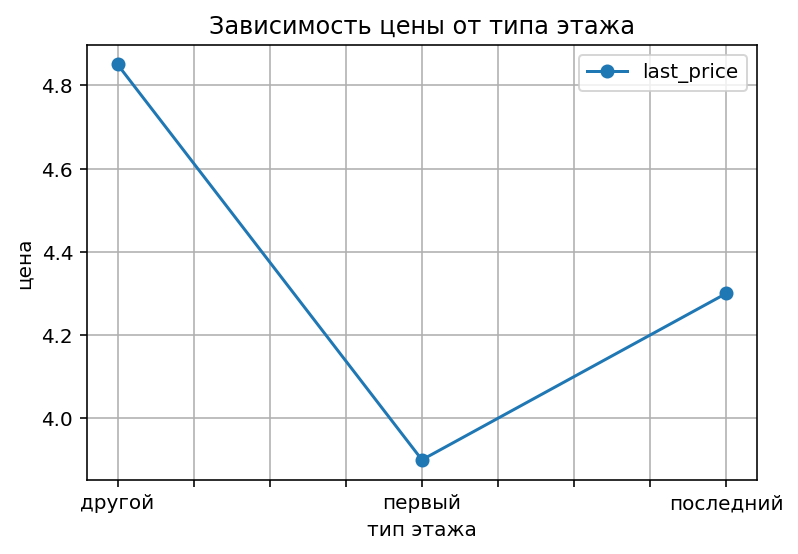

In [134]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').reset_index().plot(x='floor_type', y='last_price', grid=True, style='o-',title='Зависимость цены от типа этажа', xlabel='тип этажа', ylabel='цена')

Из графика видно, что первый этаж самый дешёвый, а самые дорогие это квартиры в середине, т.е. не первый и не крайний этажи.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Рассчитывать корреляцию Пирсона для дня недели, месяца и года продажи не эффективно, так как цена в данном случае зависит от них не линейно. Чтобы изучить зависимость для этих параметров лучше построить bar plot или гистограмму рассчитав среднее значение или медиану. Графики у тебя уже есть, поэтому остаётся только удалить расчет корреляции)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Сделано ✔️
<br>
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

<AxesSubplot:title={'center':'Зависимость цены от дня размещения'}, xlabel='day_exposition'>

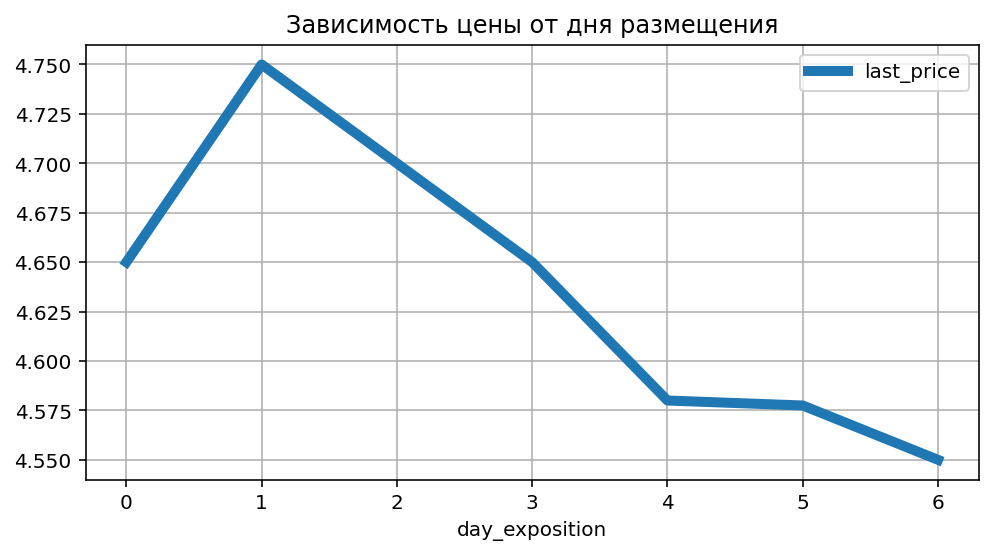

In [135]:
data.pivot_table(index='day_exposition', values='last_price', aggfunc='median').plot(grid=True, figsize=(8, 4),linewidth=5,title='Зависимость цены от дня размещения')

<AxesSubplot:title={'center':'Зависимость цены от месяца размещения'}, xlabel='month_exposition'>

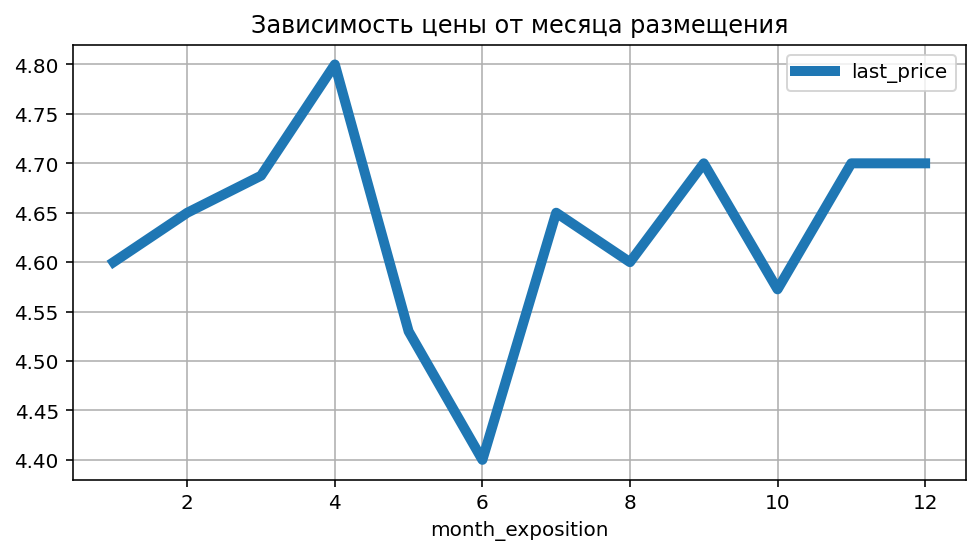

In [136]:
data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(grid=True, figsize=(8, 4),linewidth=5,title='Зависимость цены от месяца размещения')

<AxesSubplot:title={'center':'Зависимость цены от года размещения'}, xlabel='year_exposition'>

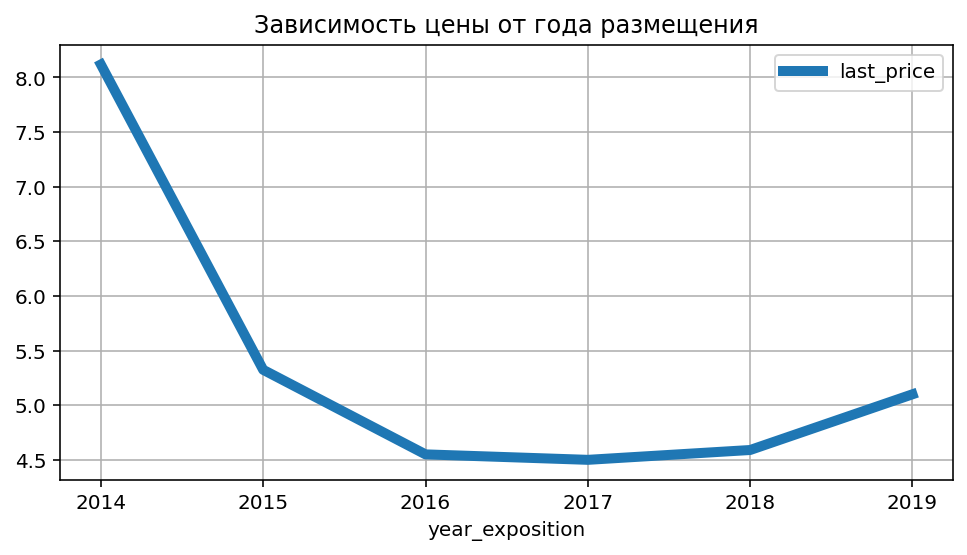

In [137]:
data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot(grid=True, figsize=(8, 4),linewidth=5,title='Зависимость цены от года размещения')


*Вывод*

Влияние на стоимость жилья выглядит следующим образом:
    
 - зависимость цены от общей площади квартиры составляет 65%, то есть с ростом квадратных метров жилья происходит и рост цены соответственно. Меньше зависимость от роста жилой площади и площади кухни - 42-45%%
     
 - зависимость цены от этажа:
   самая низкая цена  - у квартир на 1 этаже, последний этаж также "проседает" в стоимости. Цена остальных квартир также может зависеть от этажа, но на этот фактор могут влиять и другие условия (например, вид из окна, район, состояние квартиры и тд)
 
 - зависимость цены от года, месяца и дня недели размещения объявления:
    цена меняется в течение 5 лет, но зависит скорее не от года продажи, а от политических и экономических событиях. Можно отметить сезонность продаж: пик предложений и рост цены приходится на апрель, сентябрь и ноябрь. Вероятнее всего влияние оказывает рост предложений после праздничных дней и после отпусков. В мае-июне предложение на жилье падает, возможно из-за массовых отпусков. Также максимум стоимости и предложений жилья приходится на вторник и среду, минимум- на субботу и воскресенье. 

#### Задание 3

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [138]:
top_10_count = data.pivot_table(index='locality_name', values = 'last_price', aggfunc = 'count').sort_values(by='last_price', ascending=False).head(10)#топ 10 с наибольшим количеством объявлений
top_10_count.columns=['Количество_объявлений']#переименование столбца
top_10_mean = data.pivot_table(index='locality_name', values = 'price_q_m', aggfunc = 'mean')
top_10_mean.columns=['Средняя цена кв.м.']#переименование столбца
top_10_all = top_10_count.merge(top_10_mean, on = 'locality_name', how='left')#обединим две сводные таблицы

In [139]:
top_10_all

,Количество_объявлений,Средняя цена кв.м.
locality_name,,
санкт-петербург,15533,114694.633812
мурино,568,85781.823944
кудрово,467,95294.856531
шушары,437,78497.425629
всеволожск,391,68665.739130
пушкин,368,103080.701087
колпино,336,75386.851190
парголово,326,90134.650307
гатчина,303,68624.689769


In [140]:
print('Самая высокая цена за кв.м.:', top_10_all['Средняя цена кв.м.'].max())
print('Самая низкая цена за кв.м.:', top_10_all['Средняя цена кв.м.'].min())

Самая высокая цена за кв.м.: 114694.63381188437
Самая низкая цена за кв.м.: 58004.868085106384


Из топ-10 по количеству объявлений самый дорогой квадратный метр объекта недвижимости в Санкт-Петербурге, а самая низкая стоимость кв.м в Выборге. Что и закономерно, ведь жильё в крупнейшем городе будет дороже и чем расстояние больше от крупного города соответственно цена будет ниже. Из представленного списка город Выборг является самым отдаленным - 122 км.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10, так будет более наглядно)
</div>

#### Задание 4

Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

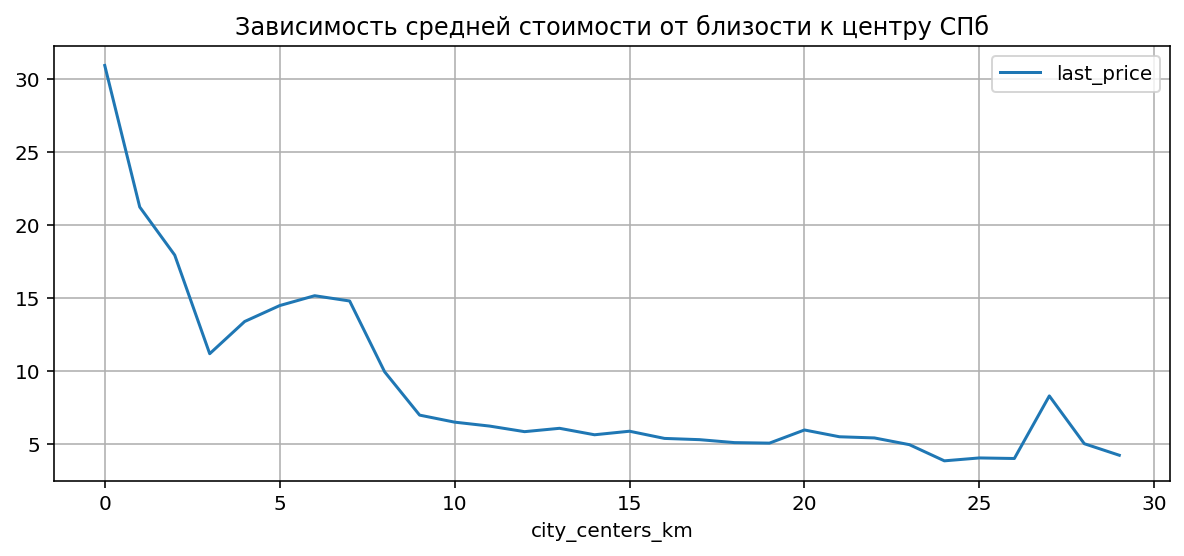

In [141]:
spb_data_pivot = spb_data.pivot_table(
    index = 'city_centers_km', 
    values = 'last_price', 
    aggfunc = 'mean')

spb_data_pivot.plot(title='Зависимость средней стоимости от близости к центру СПб', figsize=(10,4), grid=True, style='-' )
plt.show()

При анализе выявлено снижение средней стоимости недвижимости при удаления от центра. 
Наблюдается резкий рост стоимости в самом центре города от 0 до 2 км. Можно отметить, что ещё один из пиков стоимости виден на 6-7 км от центра. После 7 км идёт снижение средней стоимости жилья. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

### Общий вывод

В проекте исследованы данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

В представленном датасете выполнена предобработка данных: 
- заполнены или исключены пропуски там, где это уместно,
- исключены аномальные значения,
- проведена оптимизация типов данных,
- обработаны неявные дубликаты в наименовании населенных пунктов. 

В таблицу добавлены новые показатели:
- цена за квадратный метр,
- день, месяц и год публикации объявлений, 
- тип этажа
- расстояние в км до центра города.

Проведен исследовательский анализ данных:

- *Общая площадь.*

Медианное значение - 52 кв.м. 
Большинство квартир с общей площадью от 40 кв.м. до 70 кв.м. Свыше 100 кв.м. - редкие значения. 

- *Жилая площадь.*

Медианное значение - 30 кв.м. 
Большинство квартир с жилой площадью от 19 кв.м. до 42 кв.м. Свыше 70 кв.м. - редкие значения. 

- *Площадь кухни.*

Медианное значение - 9 кв.м. 
Большинство квартир с площадью кухни от 7 кв.м. до 12 кв.м. Свыше 17 кв.м. - редкие значения. 

- *Стоимость.*

Медианное значение - 4  млн.руб.
Стоимость основной части квартир составляет от 3,5 млн. руб. до 6,8 млн.руб. Свыше 7 млн. руб. - редкие значения. 

- *Комнаты.*

Медианное значение - 2х комнатные.
В основном квартиры состоят из 1, 2 и 3 комнат. Больше 6 комнат - редкие значения.

- *Высота потолков.*

Медианное значение - 2, 65 м.
Большинство вариантов имеют высоту потолков от 2,6 до 2,7 метров. Больше 3 м - редкие значения.

- *Этажность здания.*

Медианное значение - 9-этажное здание
Большая часть зданий в районе от 5 до 16 этажей. Больше 25 этажей - редкие значения.

- *День и месяц публикации.*

Основная часть объявлений опубликована со вторника по четверг. Самый неактивный день по публикации объявлений - воскресенье.
Самыми активными месяцами по публикации являются февраль, март, апрель и ноябрь. Самым неактивным - май (время отпусков, праздников, дач).

- *Среднее время продажи.*

Среднее время продажи составляет 180 дней (6 месяцев). Медианное значение -  в течение 95 дней (3 месяца). Разница из-за выбивающихся значений свыше 7,5 мес. При этом четверть всех объектов недвижимости была продана в течение 45 дней с момента публикации. Самая длительная продажа - 1580 дней (4,5 года). Самая быстропродаваемая недвижимость - это студии и 1-комнатные квартиры.

- *Влияние на стоимость жилья.*
    
 - наибольшая зависимость цены от общей площади квартиры. Она составляет 65%, то есть с ростом квадратных метров жилья происходит и рост цены соответственно. Меньшая зависимость от роста жилой площади и площади кухни - 42 и 45%% соответственно.
     
 - зависимость цены от этажа очевидна, если это 1 этаж, цена резко падает, последний этаж также "проседает" в стоимости. Цена остальных квартир также может зависеть от этажа, но на этот фактор могут влиять и другие условия (например, вид из окна, район, состояние квартиры и т.д.).
 
 - зависимость цены от даты размещения спорная, если говорить о дне недели. Максимум стоимости жилья приходится на вторник и среду, минимум- на субботу и воскресенье, но предложений в дни максимума больше, чем в выходные. Можно отметить сезонность продаж: пик предложений и рост цены приходится на апрель, сентябрь и ноябрь. Вероятнее всего также влияние оказывает рост предложений после праздничных дней и после отпусков. В мае-июне предложение на жилье падает, возможно из-за массовых отпусков. Что касается года публикации, то цена меняется в течение 5 лет, но зависит скорее не от года, а от каких-либо внешних факторов, например, политические или экономические события. 

 - зависит стоимость жилья и от близости к центру города. Самые дорогие квартиры в Санкт-Петербурге, а самые дешевые - в Выборге (122 км! от СПб), если смотреть топ-10 населенных пунктов по количеству объявлений. При этом в Санкт-Петербурге жилье в радиусе 7 км от центра самое дорогое.

На стоимость квадратного метра квартиры больше всего влияют: общая площадь, этажность, расстояние до центра и год публикации.


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Сделано ✔️
<br>
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудилась, большая часть работы сделана, но остаётся внести следующие правки:
<br>- заполнить пропуски в столбце ceiling_height
<br>- заполнить пропуски в столбце balcony
<br>- округлить результат в столбце с расстоянием до центра в километрах
<br>- удалить расчет корреляции для времени продажи
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Сделано ✔️
<br>
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод